<a href="https://colab.research.google.com/github/ayushve/Complete-Python-3-Bootcamp/blob/DLNLP/dlnlp_lung_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# 0. Release memory
%reset -f

# 1.0 Data manipulation library
#     Install in 'tf' environment
#     conda install -c anaconda pandas
import pandas as pd

# 1.1 Call libraries for image processing
#     Another preprocessing option is text and sequence
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1.2, Libraries for building sequential CNN model
#      A model is composed of sequence of layered objects
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Input


from tensorflow.keras import backend as K

# 1.4 Save CNN model configuration
from tensorflow.keras.models import model_from_json

# 1.5 OS related
import os

# 1.6 For ROC plotting
import matplotlib.pyplot as plt

# 1.7
import numpy as np
# conda install scikit-learn
from sklearn import metrics
import time
#from skimage import exposure           # Not used

# 1.8
# conda install -c anaconda pillow
#  Then deactivate and activate environment
#   This step is a must here
from PIL import Image                  # Needed in Windows


In [ ]:
img_width, img_height = 150, 150

train_data_dir = "D:\\chest_xray\\train"
test_data_dir = "D:\\chest_xray\\test"

train_data_dir
test_data_dir

'D:\\chest_xray\\train'

'D:\\chest_xray\\test'

In [ ]:
nb_train_samples = 2000

In [ ]:
validation_data_dir = "D:\\chest_xray\\train"

In [ ]:
nb_validation_samples = 800

In [ ]:
batch_size = 16

In [ ]:
epochs = 5

In [ ]:
test_generator_samples = 300

In [ ]:
test_batch_size = 25

In [ ]:
K.image_data_format()          # Read .keras conf file to findout
K.backend()

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:                                         # So, Tensorflow!
    input_shape = (img_width, img_height, 3)

'channels_last'

'tensorflow'

## Model design (Feature Engineering)

In [ ]:
model = Sequential()

In [ ]:
model.add(Input(shape =input_shape ))

model.add(Conv2D(
	             filters=32,

	             kernel_size=(3, 3),
	             strides = (1,1),


	             use_bias=True,
	             padding='valid',
	             name="Ist_conv_layer"
	             )
         )

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Ist_conv_layer (Conv2D)     (None, 148, 148, 32)      896       
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(Activation('relu'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Ist_conv_layer (Conv2D)     (None, 148, 148, 32)      896       
                                                                 
 activation_5 (Activation)   (None, 148, 148, 32)      0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(MaxPool2D(pool_size=(2, 2)))


model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Ist_conv_layer (Conv2D)     (None, 148, 148, 32)      896       
                                                                 
 activation_5 (Activation)   (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(Conv2D(32,
                (3, 3),
                activation = 'relu',
                name = "IInd_con_layer"))


model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Ist_conv_layer (Conv2D)     (None, 148, 148, 32)      896       
                                                                 
 activation_5 (Activation)   (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 IInd_con_layer (Conv2D)     (None, 72, 72, 32)        9248      
                                                                 
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(MaxPool2D(pool_size=(2, 2)))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Ist_conv_layer (Conv2D)     (None, 148, 148, 32)      896       
                                                                 
 activation_5 (Activation)   (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 IInd_con_layer (Conv2D)     (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
Total params: 10,144
Trainable params: 10,144
Non-trai

In [ ]:
model.add(Conv2D(64, (3, 3), name = "IIIrd_conv_layer"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Ist_conv_layer (Conv2D)     (None, 148, 148, 32)      896       
                                                                 
 activation_5 (Activation)   (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 IInd_con_layer (Conv2D)     (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 IIIrd_conv_layer (Conv2D)   (None, 34, 34, 64)       

In [ ]:
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten(name = "FlattenedLayer"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Ist_conv_layer (Conv2D)     (None, 148, 148, 32)      896       
                                                                 
 activation_5 (Activation)   (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 IInd_con_layer (Conv2D)     (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 IIIrd_conv_layer (Conv2D)   (None, 34, 34, 64)       

## Classification layer

In [ ]:
model.add(Dense(64))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Ist_conv_layer (Conv2D)     (None, 148, 148, 32)      896       
                                                                 
 activation_5 (Activation)   (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 IInd_con_layer (Conv2D)     (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 IIIrd_conv_layer (Conv2D)   (None, 34, 34, 64)       

In [ ]:
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.summary()

model.add(Dense(1))
model.summary()
model.add(Activation('sigmoid'))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Ist_conv_layer (Conv2D)     (None, 148, 148, 32)      896       
                                                                 
 activation_5 (Activation)   (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 IInd_con_layer (Conv2D)     (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 IIIrd_conv_layer (Conv2D)   (None, 34, 34, 64)       

## Compilation

In [ ]:
model.compile(
              loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


## Data Generators

In [ ]:
def preprocess(img):
    return img

In [ ]:
tr_dtgen = ImageDataGenerator(
                              rescale=1. / 255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              preprocessing_function=preprocess
                              )

In [ ]:
train_generator = tr_dtgen.flow_from_directory(
                                               train_data_dir,
                                               target_size=(img_width, img_height),
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 5216 images belonging to 2 classes.


In [ ]:
val_dtgen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
validation_generator = val_dtgen.flow_from_directory(
                                                     validation_data_dir,
                                                     target_size=(img_width, img_height),
                                                     batch_size=batch_size,
                                                     class_mode='binary'
                                                     )

Found 5216 images belonging to 2 classes.


## Model fitting


In [ ]:
start = time.time()
for e in range(epochs):
    print('Epoch', e)
    batches = 0

    for x_batch, y_batch in train_generator:



        model.fit(x_batch, y_batch)
        batches += 1
        print ("Epoch: {0} , Batches: {1}".format(e,batches))

        if batches > 200:


            break

end = time.time()
(end - start)/60

Epoch 0
1/1 [==============================] - 1s 905ms/step - loss: 0.6944 - accuracy: 0.4375


Epoch: 0 , Batches: 1
1/1 [==============================] - 0s 94ms/step - loss: 1.0264 - accuracy: 0.6250


Epoch: 0 , Batches: 2
1/1 [==============================] - 0s 110ms/step - loss: 0.7530 - accuracy: 0.4375


Epoch: 0 , Batches: 3
1/1 [==============================] - 0s 104ms/step - loss: 0.5759 - accuracy: 0.8125


Epoch: 0 , Batches: 4
1/1 [==============================] - 0s 82ms/step - loss: 0.6507 - accuracy: 0.6250


Epoch: 0 , Batches: 5
1/1 [==============================] - 0s 96ms/step - loss: 0.6035 - accuracy: 0.8125


Epoch: 0 , Batches: 6
1/1 [==============================] - 0s 94ms/step - loss: 0.6966 - accuracy: 0.6250


Epoch: 0 , Batches: 7
1/1 [==============================] - 0s 94ms/step - loss: 0.6827 - accuracy: 0.4375


Epoch: 0 , Batches: 8
1/1 [==============================] - 0s 82ms/step - loss: 0.6130 - accuracy: 0.7500


Epoch: 0 , Batches: 9
1/1 [==============================] - 0s 84ms/step - loss: 0.6186 - accuracy: 0.7500


Epoch: 0 , Batches: 10
1/1 [==============================] - 0s 80ms/step - loss: 0.7723 - accuracy: 0.5625


Epoch: 0 , Batches: 11
1/1 [==============================] - 0s 93ms/step - loss: 0.6672 - accuracy: 0.6875


Epoch: 0 , Batches: 12
1/1 [==============================] - 0s 85ms/step - loss: 0.5720 - accuracy: 0.7500


Epoch: 0 , Batches: 13
1/1 [==============================] - 0s 82ms/step - loss: 0.5473 - accuracy: 0.7500


Epoch: 0 , Batches: 14
1/1 [==============================] - 0s 94ms/step - loss: 0.6740 - accuracy: 0.6250


Epoch: 0 , Batches: 15
1/1 [==============================] - 0s 95ms/step - loss: 0.5789 - accuracy: 0.8125


Epoch: 0 , Batches: 16
1/1 [==============================] - 0s 90ms/step - loss: 0.4165 - accuracy: 0.8750


Epoch: 0 , Batches: 17
1/1 [==============================] - 0s 98ms/step - loss: 0.7487 - accuracy: 0.6875


Epoch: 0 , Batches: 18
1/1 [==============================] - 0s 97ms/step - loss: 0.6054 - accuracy: 0.7500


Epoch: 0 , Batches: 19
1/1 [==============================] - 0s 102ms/step - loss: 0.5220 - accuracy: 0.8125


Epoch: 0 , Batches: 20
1/1 [==============================] - 0s 102ms/step - loss: 0.5094 - accuracy: 0.8750


Epoch: 0 , Batches: 21
1/1 [==============================] - 0s 97ms/step - loss: 0.5859 - accuracy: 0.6250


Epoch: 0 , Batches: 22
1/1 [==============================] - 0s 90ms/step - loss: 0.5320 - accuracy: 0.8125


Epoch: 0 , Batches: 23
1/1 [==============================] - 0s 97ms/step - loss: 0.6145 - accuracy: 0.6875


Epoch: 0 , Batches: 24
1/1 [==============================] - 0s 118ms/step - loss: 0.5420 - accuracy: 0.8125


Epoch: 0 , Batches: 25
1/1 [==============================] - 0s 100ms/step - loss: 0.4516 - accuracy: 0.8125


Epoch: 0 , Batches: 26
1/1 [==============================] - 0s 118ms/step - loss: 0.5567 - accuracy: 0.8125


Epoch: 0 , Batches: 27
1/1 [==============================] - 0s 115ms/step - loss: 0.4852 - accuracy: 0.8125


Epoch: 0 , Batches: 28
1/1 [==============================] - 0s 95ms/step - loss: 0.8609 - accuracy: 0.6250


Epoch: 0 , Batches: 29
1/1 [==============================] - 0s 100ms/step - loss: 0.6208 - accuracy: 0.7500


Epoch: 0 , Batches: 30
1/1 [==============================] - 0s 100ms/step - loss: 0.5837 - accuracy: 0.7500


Epoch: 0 , Batches: 31
1/1 [==============================] - 0s 108ms/step - loss: 0.5774 - accuracy: 0.7500


Epoch: 0 , Batches: 32
1/1 [==============================] - 0s 97ms/step - loss: 0.6924 - accuracy: 0.5625


Epoch: 0 , Batches: 33
1/1 [==============================] - 0s 117ms/step - loss: 0.5792 - accuracy: 0.7500


Epoch: 0 , Batches: 34
1/1 [==============================] - 0s 117ms/step - loss: 0.6371 - accuracy: 0.6875


Epoch: 0 , Batches: 35
1/1 [==============================] - 0s 117ms/step - loss: 0.6349 - accuracy: 0.6250


Epoch: 0 , Batches: 36
1/1 [==============================] - 0s 100ms/step - loss: 0.6253 - accuracy: 0.6250


Epoch: 0 , Batches: 37
1/1 [==============================] - 0s 112ms/step - loss: 0.4865 - accuracy: 0.8750


Epoch: 0 , Batches: 38
1/1 [==============================] - 0s 113ms/step - loss: 0.9676 - accuracy: 0.5625


Epoch: 0 , Batches: 39
1/1 [==============================] - 0s 113ms/step - loss: 0.6289 - accuracy: 0.8125


Epoch: 0 , Batches: 40
1/1 [==============================] - 0s 109ms/step - loss: 0.5714 - accuracy: 0.7500


Epoch: 0 , Batches: 41
1/1 [==============================] - 0s 125ms/step - loss: 0.4444 - accuracy: 0.8750


Epoch: 0 , Batches: 42
1/1 [==============================] - 0s 113ms/step - loss: 0.6358 - accuracy: 0.7500


Epoch: 0 , Batches: 43
1/1 [==============================] - 0s 101ms/step - loss: 0.5035 - accuracy: 0.7500


Epoch: 0 , Batches: 44
1/1 [==============================] - 0s 117ms/step - loss: 0.9791 - accuracy: 0.3750


Epoch: 0 , Batches: 45
1/1 [==============================] - 0s 101ms/step - loss: 0.7954 - accuracy: 0.3125


Epoch: 0 , Batches: 46
1/1 [==============================] - 0s 116ms/step - loss: 0.5634 - accuracy: 0.8750


Epoch: 0 , Batches: 47
1/1 [==============================] - 0s 117ms/step - loss: 0.5308 - accuracy: 0.8125


Epoch: 0 , Batches: 48
1/1 [==============================] - 0s 117ms/step - loss: 0.5419 - accuracy: 0.8125


Epoch: 0 , Batches: 49
1/1 [==============================] - 0s 116ms/step - loss: 0.5392 - accuracy: 0.8125


Epoch: 0 , Batches: 50
1/1 [==============================] - 0s 106ms/step - loss: 0.6363 - accuracy: 0.6250


Epoch: 0 , Batches: 51
1/1 [==============================] - 0s 113ms/step - loss: 0.6530 - accuracy: 0.6250


Epoch: 0 , Batches: 52
1/1 [==============================] - 0s 122ms/step - loss: 0.5252 - accuracy: 0.7500


Epoch: 0 , Batches: 53
1/1 [==============================] - 0s 99ms/step - loss: 0.5252 - accuracy: 0.8125


Epoch: 0 , Batches: 54
1/1 [==============================] - 0s 94ms/step - loss: 0.4429 - accuracy: 0.8125


Epoch: 0 , Batches: 55
1/1 [==============================] - 0s 106ms/step - loss: 0.5566 - accuracy: 0.7500


Epoch: 0 , Batches: 56
1/1 [==============================] - 0s 110ms/step - loss: 0.5603 - accuracy: 0.8125


Epoch: 0 , Batches: 57
1/1 [==============================] - 0s 96ms/step - loss: 0.2599 - accuracy: 0.9375


Epoch: 0 , Batches: 58
1/1 [==============================] - 0s 108ms/step - loss: 0.6230 - accuracy: 0.8125


Epoch: 0 , Batches: 59
1/1 [==============================] - 0s 107ms/step - loss: 0.5853 - accuracy: 0.7500


Epoch: 0 , Batches: 60
1/1 [==============================] - 0s 113ms/step - loss: 0.3331 - accuracy: 0.9375


Epoch: 0 , Batches: 61
1/1 [==============================] - 0s 94ms/step - loss: 1.0058 - accuracy: 0.5625


Epoch: 0 , Batches: 62
1/1 [==============================] - 0s 94ms/step - loss: 0.5303 - accuracy: 0.8750


Epoch: 0 , Batches: 63
1/1 [==============================] - 0s 107ms/step - loss: 0.6703 - accuracy: 0.6250


Epoch: 0 , Batches: 64
1/1 [==============================] - 0s 115ms/step - loss: 0.4970 - accuracy: 0.7500


Epoch: 0 , Batches: 65
1/1 [==============================] - 0s 106ms/step - loss: 0.5058 - accuracy: 0.7500


Epoch: 0 , Batches: 66
1/1 [==============================] - 0s 103ms/step - loss: 0.3541 - accuracy: 0.8750


Epoch: 0 , Batches: 67
1/1 [==============================] - 0s 109ms/step - loss: 0.2976 - accuracy: 0.8750


Epoch: 0 , Batches: 68
1/1 [==============================] - 0s 111ms/step - loss: 0.3516 - accuracy: 0.8125


Epoch: 0 , Batches: 69
1/1 [==============================] - 0s 111ms/step - loss: 0.3209 - accuracy: 0.9375


Epoch: 0 , Batches: 70
1/1 [==============================] - 0s 107ms/step - loss: 0.5551 - accuracy: 0.7500


Epoch: 0 , Batches: 71
1/1 [==============================] - 0s 115ms/step - loss: 2.6318 - accuracy: 0.4375


Epoch: 0 , Batches: 72
1/1 [==============================] - 0s 100ms/step - loss: 0.3094 - accuracy: 1.0000


Epoch: 0 , Batches: 73
1/1 [==============================] - 0s 100ms/step - loss: 0.3524 - accuracy: 0.8750


Epoch: 0 , Batches: 74
1/1 [==============================] - 0s 112ms/step - loss: 0.6448 - accuracy: 0.6875


Epoch: 0 , Batches: 75
1/1 [==============================] - 0s 102ms/step - loss: 0.4397 - accuracy: 0.9375


Epoch: 0 , Batches: 76
1/1 [==============================] - 0s 111ms/step - loss: 0.4979 - accuracy: 0.6875


Epoch: 0 , Batches: 77
1/1 [==============================] - 0s 109ms/step - loss: 0.5939 - accuracy: 0.6875


Epoch: 0 , Batches: 78
1/1 [==============================] - 0s 121ms/step - loss: 0.3453 - accuracy: 1.0000


Epoch: 0 , Batches: 79
1/1 [==============================] - 0s 103ms/step - loss: 0.6345 - accuracy: 0.6250


Epoch: 0 , Batches: 80
1/1 [==============================] - 0s 118ms/step - loss: 0.4389 - accuracy: 0.8125


Epoch: 0 , Batches: 81
1/1 [==============================] - 0s 107ms/step - loss: 0.2528 - accuracy: 0.9375


Epoch: 0 , Batches: 82
1/1 [==============================] - 0s 109ms/step - loss: 0.7041 - accuracy: 0.5625


Epoch: 0 , Batches: 83
1/1 [==============================] - 0s 109ms/step - loss: 0.7205 - accuracy: 0.4375


Epoch: 0 , Batches: 84
1/1 [==============================] - 0s 122ms/step - loss: 0.3451 - accuracy: 0.9375


Epoch: 0 , Batches: 85
1/1 [==============================] - 0s 109ms/step - loss: 0.4695 - accuracy: 0.7500


Epoch: 0 , Batches: 86
1/1 [==============================] - 0s 91ms/step - loss: 0.4472 - accuracy: 0.6875


Epoch: 0 , Batches: 87
1/1 [==============================] - 0s 104ms/step - loss: 0.4036 - accuracy: 0.8750


Epoch: 0 , Batches: 88
1/1 [==============================] - 0s 109ms/step - loss: 0.3898 - accuracy: 0.8750


Epoch: 0 , Batches: 89
1/1 [==============================] - 0s 90ms/step - loss: 0.5259 - accuracy: 0.7500


Epoch: 0 , Batches: 90
1/1 [==============================] - 0s 109ms/step - loss: 1.5238 - accuracy: 0.5000


Epoch: 0 , Batches: 91
1/1 [==============================] - 0s 121ms/step - loss: 0.5215 - accuracy: 0.8750


Epoch: 0 , Batches: 92
1/1 [==============================] - 0s 108ms/step - loss: 0.2667 - accuracy: 1.0000


Epoch: 0 , Batches: 93
1/1 [==============================] - 0s 106ms/step - loss: 0.2246 - accuracy: 1.0000


Epoch: 0 , Batches: 94
1/1 [==============================] - 0s 102ms/step - loss: 0.6399 - accuracy: 0.5625


Epoch: 0 , Batches: 95
1/1 [==============================] - 0s 109ms/step - loss: 0.4405 - accuracy: 0.7500


Epoch: 0 , Batches: 96
1/1 [==============================] - 0s 106ms/step - loss: 0.3980 - accuracy: 0.8125


Epoch: 0 , Batches: 97
1/1 [==============================] - 0s 100ms/step - loss: 0.3482 - accuracy: 0.8125


Epoch: 0 , Batches: 98
1/1 [==============================] - 0s 106ms/step - loss: 0.6777 - accuracy: 0.6875


Epoch: 0 , Batches: 99
1/1 [==============================] - 0s 92ms/step - loss: 0.2935 - accuracy: 0.9375


Epoch: 0 , Batches: 100
1/1 [==============================] - 0s 106ms/step - loss: 0.5120 - accuracy: 0.7500


Epoch: 0 , Batches: 101
1/1 [==============================] - 0s 105ms/step - loss: 0.4625 - accuracy: 0.8125


Epoch: 0 , Batches: 102
1/1 [==============================] - 0s 108ms/step - loss: 0.2903 - accuracy: 0.9375


Epoch: 0 , Batches: 103
1/1 [==============================] - 0s 98ms/step - loss: 0.6024 - accuracy: 0.8125


Epoch: 0 , Batches: 104
1/1 [==============================] - 0s 104ms/step - loss: 0.4673 - accuracy: 0.6875


Epoch: 0 , Batches: 105
1/1 [==============================] - 0s 97ms/step - loss: 0.4730 - accuracy: 0.7500


Epoch: 0 , Batches: 106
1/1 [==============================] - 0s 102ms/step - loss: 0.3608 - accuracy: 0.8125


Epoch: 0 , Batches: 107
1/1 [==============================] - 0s 90ms/step - loss: 0.3779 - accuracy: 0.8125


Epoch: 0 , Batches: 108
1/1 [==============================] - 0s 108ms/step - loss: 0.3088 - accuracy: 0.8125


Epoch: 0 , Batches: 109
1/1 [==============================] - 0s 97ms/step - loss: 0.2592 - accuracy: 0.9375


Epoch: 0 , Batches: 110
1/1 [==============================] - 0s 99ms/step - loss: 0.3227 - accuracy: 0.8125


Epoch: 0 , Batches: 111
1/1 [==============================] - 0s 101ms/step - loss: 0.7069 - accuracy: 0.6875


Epoch: 0 , Batches: 112
1/1 [==============================] - 0s 109ms/step - loss: 0.5097 - accuracy: 0.7500


Epoch: 0 , Batches: 113
1/1 [==============================] - 0s 122ms/step - loss: 0.2277 - accuracy: 0.9375


Epoch: 0 , Batches: 114
1/1 [==============================] - 0s 101ms/step - loss: 0.3301 - accuracy: 0.8125


Epoch: 0 , Batches: 115
1/1 [==============================] - 0s 102ms/step - loss: 0.3957 - accuracy: 0.8750


Epoch: 0 , Batches: 116
1/1 [==============================] - 0s 108ms/step - loss: 0.2025 - accuracy: 0.9375


Epoch: 0 , Batches: 117
1/1 [==============================] - 0s 108ms/step - loss: 0.4615 - accuracy: 0.8125


Epoch: 0 , Batches: 118
1/1 [==============================] - 0s 112ms/step - loss: 0.5494 - accuracy: 0.8750


Epoch: 0 , Batches: 119
1/1 [==============================] - 0s 108ms/step - loss: 0.8832 - accuracy: 0.4375


Epoch: 0 , Batches: 120
1/1 [==============================] - 0s 108ms/step - loss: 0.2838 - accuracy: 0.9375


Epoch: 0 , Batches: 121
1/1 [==============================] - 0s 100ms/step - loss: 0.8698 - accuracy: 0.6250


Epoch: 0 , Batches: 122
1/1 [==============================] - 0s 106ms/step - loss: 0.4142 - accuracy: 0.8750


Epoch: 0 , Batches: 123
1/1 [==============================] - 0s 102ms/step - loss: 0.3824 - accuracy: 0.8750


Epoch: 0 , Batches: 124
1/1 [==============================] - 0s 101ms/step - loss: 0.3988 - accuracy: 0.8750


Epoch: 0 , Batches: 125
1/1 [==============================] - 0s 109ms/step - loss: 0.3629 - accuracy: 0.9375


Epoch: 0 , Batches: 126
1/1 [==============================] - 0s 110ms/step - loss: 0.3603 - accuracy: 0.8125


Epoch: 0 , Batches: 127
1/1 [==============================] - 0s 112ms/step - loss: 0.3305 - accuracy: 0.8125


Epoch: 0 , Batches: 128
1/1 [==============================] - 0s 112ms/step - loss: 0.2308 - accuracy: 0.9375


Epoch: 0 , Batches: 129
1/1 [==============================] - 0s 109ms/step - loss: 0.2510 - accuracy: 0.8750


Epoch: 0 , Batches: 130
1/1 [==============================] - 0s 96ms/step - loss: 0.3038 - accuracy: 0.7500


Epoch: 0 , Batches: 131
1/1 [==============================] - 0s 97ms/step - loss: 0.4366 - accuracy: 0.8125


Epoch: 0 , Batches: 132
1/1 [==============================] - 0s 109ms/step - loss: 0.5946 - accuracy: 0.7500


Epoch: 0 , Batches: 133
1/1 [==============================] - 0s 96ms/step - loss: 0.6628 - accuracy: 0.6250


Epoch: 0 , Batches: 134
1/1 [==============================] - 0s 116ms/step - loss: 0.3373 - accuracy: 0.8125


Epoch: 0 , Batches: 135
1/1 [==============================] - 0s 109ms/step - loss: 0.7220 - accuracy: 0.6250


Epoch: 0 , Batches: 136
1/1 [==============================] - 0s 100ms/step - loss: 0.5077 - accuracy: 0.6875


Epoch: 0 , Batches: 137
1/1 [==============================] - 0s 120ms/step - loss: 0.3907 - accuracy: 0.8750


Epoch: 0 , Batches: 138
1/1 [==============================] - 0s 107ms/step - loss: 0.2746 - accuracy: 0.9375


Epoch: 0 , Batches: 139
1/1 [==============================] - 0s 99ms/step - loss: 0.2367 - accuracy: 0.8750


Epoch: 0 , Batches: 140
1/1 [==============================] - 0s 120ms/step - loss: 0.5199 - accuracy: 0.7500


Epoch: 0 , Batches: 141
1/1 [==============================] - 0s 108ms/step - loss: 0.5445 - accuracy: 0.6250


Epoch: 0 , Batches: 142
1/1 [==============================] - 0s 106ms/step - loss: 0.1991 - accuracy: 0.9375


Epoch: 0 , Batches: 143
1/1 [==============================] - 0s 102ms/step - loss: 0.3730 - accuracy: 0.9375


Epoch: 0 , Batches: 144
1/1 [==============================] - 0s 113ms/step - loss: 0.2762 - accuracy: 0.8750


Epoch: 0 , Batches: 145
1/1 [==============================] - 0s 106ms/step - loss: 0.3966 - accuracy: 0.6875


Epoch: 0 , Batches: 146
1/1 [==============================] - 0s 105ms/step - loss: 0.3708 - accuracy: 0.8125


Epoch: 0 , Batches: 147
1/1 [==============================] - 0s 104ms/step - loss: 0.1921 - accuracy: 0.9375


Epoch: 0 , Batches: 148
1/1 [==============================] - 0s 105ms/step - loss: 0.0512 - accuracy: 1.0000


Epoch: 0 , Batches: 149
1/1 [==============================] - 0s 98ms/step - loss: 0.4352 - accuracy: 0.8125


Epoch: 0 , Batches: 150
1/1 [==============================] - 0s 109ms/step - loss: 0.2479 - accuracy: 1.0000


Epoch: 0 , Batches: 151
1/1 [==============================] - 0s 109ms/step - loss: 0.4940 - accuracy: 0.7500


Epoch: 0 , Batches: 152
1/1 [==============================] - 0s 97ms/step - loss: 0.2853 - accuracy: 1.0000


Epoch: 0 , Batches: 153
1/1 [==============================] - 0s 100ms/step - loss: 0.3577 - accuracy: 0.8125


Epoch: 0 , Batches: 154
1/1 [==============================] - 0s 109ms/step - loss: 0.6012 - accuracy: 0.7500


Epoch: 0 , Batches: 155
1/1 [==============================] - 0s 105ms/step - loss: 0.2580 - accuracy: 0.9375


Epoch: 0 , Batches: 156
1/1 [==============================] - 0s 108ms/step - loss: 0.4139 - accuracy: 0.8750


Epoch: 0 , Batches: 157
1/1 [==============================] - 0s 107ms/step - loss: 0.2529 - accuracy: 1.0000


Epoch: 0 , Batches: 158
1/1 [==============================] - 0s 109ms/step - loss: 0.2611 - accuracy: 0.8750


Epoch: 0 , Batches: 159
1/1 [==============================] - 0s 99ms/step - loss: 0.2270 - accuracy: 0.8750


Epoch: 0 , Batches: 160
1/1 [==============================] - 0s 105ms/step - loss: 0.4433 - accuracy: 0.7500


Epoch: 0 , Batches: 161
1/1 [==============================] - 0s 94ms/step - loss: 0.3195 - accuracy: 0.9375


Epoch: 0 , Batches: 162
1/1 [==============================] - 0s 105ms/step - loss: 0.3802 - accuracy: 0.7500


Epoch: 0 , Batches: 163
1/1 [==============================] - 0s 96ms/step - loss: 0.9419 - accuracy: 0.6875


Epoch: 0 , Batches: 164
1/1 [==============================] - 0s 109ms/step - loss: 0.6426 - accuracy: 0.6250


Epoch: 0 , Batches: 165
1/1 [==============================] - 0s 117ms/step - loss: 0.5087 - accuracy: 0.6875


Epoch: 0 , Batches: 166
1/1 [==============================] - 0s 121ms/step - loss: 0.3395 - accuracy: 0.8750


Epoch: 0 , Batches: 167
1/1 [==============================] - 0s 100ms/step - loss: 0.3271 - accuracy: 0.8750


Epoch: 0 , Batches: 168
1/1 [==============================] - 0s 109ms/step - loss: 0.3015 - accuracy: 0.9375


Epoch: 0 , Batches: 169
1/1 [==============================] - 0s 105ms/step - loss: 0.2968 - accuracy: 0.7500


Epoch: 0 , Batches: 170
1/1 [==============================] - 0s 109ms/step - loss: 0.3034 - accuracy: 0.9375


Epoch: 0 , Batches: 171
1/1 [==============================] - 0s 110ms/step - loss: 0.6163 - accuracy: 0.7500


Epoch: 0 , Batches: 172
1/1 [==============================] - 0s 92ms/step - loss: 0.2492 - accuracy: 0.8750


Epoch: 0 , Batches: 173
1/1 [==============================] - 0s 109ms/step - loss: 0.2765 - accuracy: 0.8750


Epoch: 0 , Batches: 174
1/1 [==============================] - 0s 109ms/step - loss: 0.2848 - accuracy: 0.8750


Epoch: 0 , Batches: 175
1/1 [==============================] - 0s 103ms/step - loss: 0.1302 - accuracy: 1.0000


Epoch: 0 , Batches: 176
1/1 [==============================] - 0s 110ms/step - loss: 0.2742 - accuracy: 0.8125


Epoch: 0 , Batches: 177
1/1 [==============================] - 0s 95ms/step - loss: 0.4162 - accuracy: 0.8125


Epoch: 0 , Batches: 178
1/1 [==============================] - 0s 101ms/step - loss: 0.3352 - accuracy: 0.8125


Epoch: 0 , Batches: 179
1/1 [==============================] - 0s 106ms/step - loss: 0.3302 - accuracy: 0.8750


Epoch: 0 , Batches: 180
1/1 [==============================] - 0s 101ms/step - loss: 0.2006 - accuracy: 1.0000


Epoch: 0 , Batches: 181
1/1 [==============================] - 0s 109ms/step - loss: 0.2998 - accuracy: 0.8750


Epoch: 0 , Batches: 182
1/1 [==============================] - 0s 105ms/step - loss: 0.5994 - accuracy: 0.8125


Epoch: 0 , Batches: 183
1/1 [==============================] - 0s 108ms/step - loss: 1.3442 - accuracy: 0.7500


Epoch: 0 , Batches: 184
1/1 [==============================] - 0s 109ms/step - loss: 0.3342 - accuracy: 0.8750


Epoch: 0 , Batches: 185
1/1 [==============================] - 0s 96ms/step - loss: 0.5076 - accuracy: 0.7500


Epoch: 0 , Batches: 186
1/1 [==============================] - 0s 107ms/step - loss: 0.2211 - accuracy: 0.9375


Epoch: 0 , Batches: 187
1/1 [==============================] - 0s 94ms/step - loss: 0.6499 - accuracy: 0.6875


Epoch: 0 , Batches: 188
1/1 [==============================] - 0s 105ms/step - loss: 0.2083 - accuracy: 0.9375


Epoch: 0 , Batches: 189
1/1 [==============================] - 0s 94ms/step - loss: 0.3562 - accuracy: 0.8125


Epoch: 0 , Batches: 190
1/1 [==============================] - 0s 99ms/step - loss: 0.6009 - accuracy: 0.8750


Epoch: 0 , Batches: 191
1/1 [==============================] - 0s 117ms/step - loss: 0.3912 - accuracy: 0.8750


Epoch: 0 , Batches: 192
1/1 [==============================] - 0s 108ms/step - loss: 0.2270 - accuracy: 0.9375


Epoch: 0 , Batches: 193
1/1 [==============================] - 0s 111ms/step - loss: 0.2929 - accuracy: 0.8750


Epoch: 0 , Batches: 194
1/1 [==============================] - 0s 95ms/step - loss: 0.3741 - accuracy: 0.8750


Epoch: 0 , Batches: 195
1/1 [==============================] - 0s 106ms/step - loss: 0.2835 - accuracy: 0.8125


Epoch: 0 , Batches: 196
1/1 [==============================] - 0s 96ms/step - loss: 0.5423 - accuracy: 0.6875


Epoch: 0 , Batches: 197
1/1 [==============================] - 0s 111ms/step - loss: 0.3884 - accuracy: 0.8750


Epoch: 0 , Batches: 198
1/1 [==============================] - 0s 108ms/step - loss: 0.2964 - accuracy: 0.8750


Epoch: 0 , Batches: 199
1/1 [==============================] - 0s 117ms/step - loss: 0.4293 - accuracy: 0.8125


Epoch: 0 , Batches: 200
1/1 [==============================] - 0s 102ms/step - loss: 0.2680 - accuracy: 0.9375


Epoch: 0 , Batches: 201
Epoch 1
1/1 [==============================] - 0s 99ms/step - loss: 0.3503 - accuracy: 0.8125


Epoch: 1 , Batches: 1
1/1 [==============================] - 0s 94ms/step - loss: 0.2885 - accuracy: 0.9375


Epoch: 1 , Batches: 2
1/1 [==============================] - 0s 104ms/step - loss: 0.3064 - accuracy: 0.8125


Epoch: 1 , Batches: 3
1/1 [==============================] - 0s 108ms/step - loss: 0.5144 - accuracy: 0.6875


Epoch: 1 , Batches: 4
1/1 [==============================] - 0s 109ms/step - loss: 0.4569 - accuracy: 0.8125


Epoch: 1 , Batches: 5
1/1 [==============================] - 0s 94ms/step - loss: 0.2560 - accuracy: 0.8125


Epoch: 1 , Batches: 6
1/1 [==============================] - 0s 105ms/step - loss: 0.2098 - accuracy: 0.9375


Epoch: 1 , Batches: 7
1/1 [==============================] - 0s 113ms/step - loss: 0.1151 - accuracy: 1.0000


Epoch: 1 , Batches: 8
1/1 [==============================] - 0s 94ms/step - loss: 0.2437 - accuracy: 0.8750


Epoch: 1 , Batches: 9
1/1 [==============================] - 0s 104ms/step - loss: 0.1766 - accuracy: 0.9375


Epoch: 1 , Batches: 10
1/1 [==============================] - 0s 104ms/step - loss: 0.4427 - accuracy: 0.7500


Epoch: 1 , Batches: 11
1/1 [==============================] - 0s 105ms/step - loss: 0.3249 - accuracy: 0.8750


Epoch: 1 , Batches: 12
1/1 [==============================] - 0s 98ms/step - loss: 0.1513 - accuracy: 1.0000


Epoch: 1 , Batches: 13
1/1 [==============================] - 0s 113ms/step - loss: 0.6706 - accuracy: 0.7500


Epoch: 1 , Batches: 14
1/1 [==============================] - 0s 123ms/step - loss: 0.2475 - accuracy: 0.9375


Epoch: 1 , Batches: 15
1/1 [==============================] - 0s 112ms/step - loss: 0.4904 - accuracy: 0.8125


Epoch: 1 , Batches: 16
1/1 [==============================] - 0s 99ms/step - loss: 0.2089 - accuracy: 1.0000


Epoch: 1 , Batches: 17
1/1 [==============================] - 0s 97ms/step - loss: 0.4363 - accuracy: 0.8750


Epoch: 1 , Batches: 18
1/1 [==============================] - 0s 116ms/step - loss: 0.2185 - accuracy: 1.0000


Epoch: 1 , Batches: 19
1/1 [==============================] - 0s 94ms/step - loss: 0.1423 - accuracy: 1.0000


Epoch: 1 , Batches: 20
1/1 [==============================] - 0s 109ms/step - loss: 0.3167 - accuracy: 0.8125


Epoch: 1 , Batches: 21
1/1 [==============================] - 0s 96ms/step - loss: 0.1996 - accuracy: 0.8750


Epoch: 1 , Batches: 22
1/1 [==============================] - 0s 95ms/step - loss: 0.2748 - accuracy: 0.7500


Epoch: 1 , Batches: 23
1/1 [==============================] - 0s 100ms/step - loss: 0.4181 - accuracy: 0.7500


Epoch: 1 , Batches: 24
1/1 [==============================] - 0s 108ms/step - loss: 0.2503 - accuracy: 0.8750


Epoch: 1 , Batches: 25
1/1 [==============================] - 0s 108ms/step - loss: 0.4538 - accuracy: 0.7500


Epoch: 1 , Batches: 26
1/1 [==============================] - 0s 97ms/step - loss: 0.3112 - accuracy: 0.8750


Epoch: 1 , Batches: 27
1/1 [==============================] - 0s 100ms/step - loss: 0.1432 - accuracy: 0.9375


Epoch: 1 , Batches: 28
1/1 [==============================] - 0s 100ms/step - loss: 0.0776 - accuracy: 1.0000


Epoch: 1 , Batches: 29
1/1 [==============================] - 0s 94ms/step - loss: 0.1904 - accuracy: 0.8750


Epoch: 1 , Batches: 30
1/1 [==============================] - 0s 109ms/step - loss: 1.0294 - accuracy: 0.8125


Epoch: 1 , Batches: 31
1/1 [==============================] - 0s 104ms/step - loss: 0.3537 - accuracy: 0.8125


Epoch: 1 , Batches: 32
1/1 [==============================] - 0s 99ms/step - loss: 0.4198 - accuracy: 0.8125


Epoch: 1 , Batches: 33
1/1 [==============================] - 0s 113ms/step - loss: 0.4761 - accuracy: 0.7500


Epoch: 1 , Batches: 34
1/1 [==============================] - 0s 106ms/step - loss: 0.2290 - accuracy: 0.9375


Epoch: 1 , Batches: 35
1/1 [==============================] - 0s 116ms/step - loss: 0.5895 - accuracy: 0.7500


Epoch: 1 , Batches: 36
1/1 [==============================] - 0s 113ms/step - loss: 0.1734 - accuracy: 0.9375


Epoch: 1 , Batches: 37
1/1 [==============================] - 0s 106ms/step - loss: 0.0644 - accuracy: 1.0000


Epoch: 1 , Batches: 38
1/1 [==============================] - 0s 93ms/step - loss: 0.3168 - accuracy: 0.8750


Epoch: 1 , Batches: 39
1/1 [==============================] - 0s 93ms/step - loss: 0.3111 - accuracy: 0.8750


Epoch: 1 , Batches: 40
1/1 [==============================] - 0s 92ms/step - loss: 1.0816 - accuracy: 0.6250


Epoch: 1 , Batches: 41
1/1 [==============================] - 0s 107ms/step - loss: 0.3803 - accuracy: 0.8750


Epoch: 1 , Batches: 42
1/1 [==============================] - 0s 97ms/step - loss: 0.4216 - accuracy: 0.7500


Epoch: 1 , Batches: 43
1/1 [==============================] - 0s 120ms/step - loss: 0.5653 - accuracy: 0.6875


Epoch: 1 , Batches: 44
1/1 [==============================] - 0s 108ms/step - loss: 0.2243 - accuracy: 0.9375


Epoch: 1 , Batches: 45
1/1 [==============================] - 0s 99ms/step - loss: 0.2264 - accuracy: 0.8125


Epoch: 1 , Batches: 46
1/1 [==============================] - 0s 92ms/step - loss: 0.3770 - accuracy: 0.8750


Epoch: 1 , Batches: 47
1/1 [==============================] - 0s 112ms/step - loss: 0.3368 - accuracy: 0.8125


Epoch: 1 , Batches: 48
1/1 [==============================] - 0s 100ms/step - loss: 0.2120 - accuracy: 0.9375


Epoch: 1 , Batches: 49
1/1 [==============================] - 0s 96ms/step - loss: 0.1525 - accuracy: 0.8750


Epoch: 1 , Batches: 50
1/1 [==============================] - 0s 116ms/step - loss: 0.4912 - accuracy: 0.8125


Epoch: 1 , Batches: 51
1/1 [==============================] - 0s 99ms/step - loss: 0.3031 - accuracy: 0.8125


Epoch: 1 , Batches: 52
1/1 [==============================] - 0s 107ms/step - loss: 0.2621 - accuracy: 0.8750


Epoch: 1 , Batches: 53
1/1 [==============================] - 0s 115ms/step - loss: 0.3274 - accuracy: 0.8750


Epoch: 1 , Batches: 54
1/1 [==============================] - 0s 116ms/step - loss: 0.2170 - accuracy: 1.0000


Epoch: 1 , Batches: 55
1/1 [==============================] - 0s 113ms/step - loss: 0.3061 - accuracy: 0.8125


Epoch: 1 , Batches: 56
1/1 [==============================] - 0s 118ms/step - loss: 0.3146 - accuracy: 0.9375


Epoch: 1 , Batches: 57
1/1 [==============================] - 0s 100ms/step - loss: 0.2400 - accuracy: 0.9375


Epoch: 1 , Batches: 58
1/1 [==============================] - 0s 104ms/step - loss: 0.5104 - accuracy: 0.8125


Epoch: 1 , Batches: 59
1/1 [==============================] - 0s 113ms/step - loss: 0.3719 - accuracy: 0.8125


Epoch: 1 , Batches: 60
1/1 [==============================] - 0s 117ms/step - loss: 0.4075 - accuracy: 0.8125


Epoch: 1 , Batches: 61
1/1 [==============================] - 0s 108ms/step - loss: 0.2635 - accuracy: 0.9375


Epoch: 1 , Batches: 62
1/1 [==============================] - 0s 110ms/step - loss: 0.3638 - accuracy: 0.8125


Epoch: 1 , Batches: 63
1/1 [==============================] - 0s 105ms/step - loss: 0.1193 - accuracy: 1.0000


Epoch: 1 , Batches: 64
1/1 [==============================] - 0s 109ms/step - loss: 0.2824 - accuracy: 0.9375


Epoch: 1 , Batches: 65
1/1 [==============================] - 0s 103ms/step - loss: 0.3447 - accuracy: 0.8750


Epoch: 1 , Batches: 66
1/1 [==============================] - 0s 100ms/step - loss: 0.2055 - accuracy: 0.9375


Epoch: 1 , Batches: 67
1/1 [==============================] - 0s 98ms/step - loss: 0.1904 - accuracy: 0.9375


Epoch: 1 , Batches: 68
1/1 [==============================] - 0s 97ms/step - loss: 0.5641 - accuracy: 0.8125


Epoch: 1 , Batches: 69
1/1 [==============================] - 0s 109ms/step - loss: 0.3049 - accuracy: 0.9375


Epoch: 1 , Batches: 70
1/1 [==============================] - 0s 104ms/step - loss: 0.2227 - accuracy: 0.8750


Epoch: 1 , Batches: 71
1/1 [==============================] - 0s 109ms/step - loss: 0.4819 - accuracy: 0.7500


Epoch: 1 , Batches: 72
1/1 [==============================] - 0s 107ms/step - loss: 0.4110 - accuracy: 0.8125


Epoch: 1 , Batches: 73
1/1 [==============================] - 0s 108ms/step - loss: 0.4081 - accuracy: 0.7500


Epoch: 1 , Batches: 74
1/1 [==============================] - 0s 107ms/step - loss: 0.2180 - accuracy: 0.8750


Epoch: 1 , Batches: 75
1/1 [==============================] - 0s 109ms/step - loss: 0.3330 - accuracy: 0.8750


Epoch: 1 , Batches: 76
1/1 [==============================] - 0s 109ms/step - loss: 0.3025 - accuracy: 0.8750


Epoch: 1 , Batches: 77
1/1 [==============================] - 0s 99ms/step - loss: 0.1443 - accuracy: 1.0000


Epoch: 1 , Batches: 78
1/1 [==============================] - 0s 110ms/step - loss: 0.5317 - accuracy: 0.8750


Epoch: 1 , Batches: 79
1/1 [==============================] - 0s 94ms/step - loss: 0.2818 - accuracy: 0.9375


Epoch: 1 , Batches: 80
1/1 [==============================] - 0s 109ms/step - loss: 0.2422 - accuracy: 0.8750


Epoch: 1 , Batches: 81
1/1 [==============================] - 0s 117ms/step - loss: 0.0488 - accuracy: 1.0000


Epoch: 1 , Batches: 82
1/1 [==============================] - 0s 94ms/step - loss: 0.1252 - accuracy: 0.9375


Epoch: 1 , Batches: 83
1/1 [==============================] - 0s 107ms/step - loss: 0.3038 - accuracy: 0.8125


Epoch: 1 , Batches: 84
1/1 [==============================] - 0s 106ms/step - loss: 0.3382 - accuracy: 0.7500


Epoch: 1 , Batches: 85
1/1 [==============================] - 0s 94ms/step - loss: 0.2030 - accuracy: 0.8750


Epoch: 1 , Batches: 86
1/1 [==============================] - 0s 92ms/step - loss: 0.2431 - accuracy: 0.9375


Epoch: 1 , Batches: 87
1/1 [==============================] - 0s 92ms/step - loss: 0.1753 - accuracy: 0.8750


Epoch: 1 , Batches: 88
1/1 [==============================] - 0s 85ms/step - loss: 0.2290 - accuracy: 0.8125


Epoch: 1 , Batches: 89
1/1 [==============================] - 0s 90ms/step - loss: 0.1751 - accuracy: 0.9375


Epoch: 1 , Batches: 90
1/1 [==============================] - 0s 94ms/step - loss: 0.7165 - accuracy: 0.7500


Epoch: 1 , Batches: 91
1/1 [==============================] - 0s 91ms/step - loss: 0.3525 - accuracy: 0.8125


Epoch: 1 , Batches: 92
1/1 [==============================] - 0s 91ms/step - loss: 0.1196 - accuracy: 1.0000


Epoch: 1 , Batches: 93
1/1 [==============================] - 0s 94ms/step - loss: 0.1788 - accuracy: 0.9375


Epoch: 1 , Batches: 94
1/1 [==============================] - 0s 93ms/step - loss: 0.2801 - accuracy: 0.7500


Epoch: 1 , Batches: 95
1/1 [==============================] - 0s 107ms/step - loss: 0.3173 - accuracy: 0.9375


Epoch: 1 , Batches: 96
1/1 [==============================] - 0s 84ms/step - loss: 0.5217 - accuracy: 0.7500


Epoch: 1 , Batches: 97
1/1 [==============================] - 0s 92ms/step - loss: 0.3423 - accuracy: 0.8125


Epoch: 1 , Batches: 98
1/1 [==============================] - 0s 91ms/step - loss: 0.2042 - accuracy: 0.8750


Epoch: 1 , Batches: 99
1/1 [==============================] - 0s 89ms/step - loss: 0.2402 - accuracy: 0.8125


Epoch: 1 , Batches: 100
1/1 [==============================] - 0s 105ms/step - loss: 0.1963 - accuracy: 0.9375


Epoch: 1 , Batches: 101
1/1 [==============================] - 0s 94ms/step - loss: 0.1518 - accuracy: 0.8750


Epoch: 1 , Batches: 102
1/1 [==============================] - 0s 95ms/step - loss: 0.1578 - accuracy: 0.9375


Epoch: 1 , Batches: 103
1/1 [==============================] - 0s 91ms/step - loss: 0.5357 - accuracy: 0.8125


Epoch: 1 , Batches: 104
1/1 [==============================] - 0s 97ms/step - loss: 0.2290 - accuracy: 0.9375


Epoch: 1 , Batches: 105
1/1 [==============================] - 0s 93ms/step - loss: 0.3112 - accuracy: 0.8125


Epoch: 1 , Batches: 106
1/1 [==============================] - 0s 91ms/step - loss: 0.1153 - accuracy: 1.0000


Epoch: 1 , Batches: 107
1/1 [==============================] - 0s 106ms/step - loss: 0.1459 - accuracy: 0.9375


Epoch: 1 , Batches: 108
1/1 [==============================] - 0s 98ms/step - loss: 0.1269 - accuracy: 0.9375


Epoch: 1 , Batches: 109
1/1 [==============================] - 0s 98ms/step - loss: 0.1997 - accuracy: 0.8750


Epoch: 1 , Batches: 110
1/1 [==============================] - 0s 95ms/step - loss: 0.1588 - accuracy: 0.9375


Epoch: 1 , Batches: 111
1/1 [==============================] - 0s 92ms/step - loss: 0.1187 - accuracy: 0.9375


Epoch: 1 , Batches: 112
1/1 [==============================] - 0s 112ms/step - loss: 0.2695 - accuracy: 0.7500


Epoch: 1 , Batches: 113
1/1 [==============================] - 0s 109ms/step - loss: 0.1643 - accuracy: 0.9375


Epoch: 1 , Batches: 114
1/1 [==============================] - 0s 93ms/step - loss: 0.2864 - accuracy: 0.8750


Epoch: 1 , Batches: 115
1/1 [==============================] - 0s 123ms/step - loss: 0.4669 - accuracy: 0.7500


Epoch: 1 , Batches: 116
1/1 [==============================] - 0s 102ms/step - loss: 0.4627 - accuracy: 0.8125


Epoch: 1 , Batches: 117
1/1 [==============================] - 0s 98ms/step - loss: 0.1184 - accuracy: 1.0000


Epoch: 1 , Batches: 118
1/1 [==============================] - 0s 97ms/step - loss: 0.1169 - accuracy: 0.9375


Epoch: 1 , Batches: 119
1/1 [==============================] - 0s 92ms/step - loss: 0.4377 - accuracy: 0.8750


Epoch: 1 , Batches: 120
1/1 [==============================] - 0s 117ms/step - loss: 0.3264 - accuracy: 0.8125


Epoch: 1 , Batches: 121
1/1 [==============================] - 0s 122ms/step - loss: 0.3498 - accuracy: 0.7500


Epoch: 1 , Batches: 122
1/1 [==============================] - 0s 97ms/step - loss: 0.2085 - accuracy: 0.8750


Epoch: 1 , Batches: 123
1/1 [==============================] - 0s 104ms/step - loss: 0.3963 - accuracy: 0.7500


Epoch: 1 , Batches: 124
1/1 [==============================] - 0s 107ms/step - loss: 0.2631 - accuracy: 0.9375


Epoch: 1 , Batches: 125
1/1 [==============================] - 0s 113ms/step - loss: 0.1752 - accuracy: 0.9375


Epoch: 1 , Batches: 126
1/1 [==============================] - 0s 107ms/step - loss: 0.0871 - accuracy: 1.0000


Epoch: 1 , Batches: 127
1/1 [==============================] - 0s 117ms/step - loss: 0.7057 - accuracy: 0.8750


Epoch: 1 , Batches: 128
1/1 [==============================] - 0s 114ms/step - loss: 0.4406 - accuracy: 0.8125


Epoch: 1 , Batches: 129
1/1 [==============================] - 0s 95ms/step - loss: 0.4050 - accuracy: 0.8125


Epoch: 1 , Batches: 130
1/1 [==============================] - 0s 103ms/step - loss: 0.2607 - accuracy: 0.8750


Epoch: 1 , Batches: 131
1/1 [==============================] - 0s 104ms/step - loss: 0.5224 - accuracy: 0.7500


Epoch: 1 , Batches: 132
1/1 [==============================] - 0s 113ms/step - loss: 0.1645 - accuracy: 0.9375


Epoch: 1 , Batches: 133
1/1 [==============================] - 0s 110ms/step - loss: 0.2157 - accuracy: 1.0000


Epoch: 1 , Batches: 134
1/1 [==============================] - 0s 101ms/step - loss: 0.2950 - accuracy: 0.9375


Epoch: 1 , Batches: 135
1/1 [==============================] - 0s 98ms/step - loss: 0.4821 - accuracy: 0.6875


Epoch: 1 , Batches: 136
1/1 [==============================] - 0s 101ms/step - loss: 0.2404 - accuracy: 0.9375


Epoch: 1 , Batches: 137
1/1 [==============================] - 0s 95ms/step - loss: 0.2151 - accuracy: 0.9375


Epoch: 1 , Batches: 138
1/1 [==============================] - 0s 113ms/step - loss: 0.2023 - accuracy: 0.9375


Epoch: 1 , Batches: 139
1/1 [==============================] - 0s 115ms/step - loss: 0.1511 - accuracy: 0.9375


Epoch: 1 , Batches: 140
1/1 [==============================] - 0s 123ms/step - loss: 0.2504 - accuracy: 0.8750


Epoch: 1 , Batches: 141
1/1 [==============================] - 0s 95ms/step - loss: 0.2201 - accuracy: 0.9375


Epoch: 1 , Batches: 142
1/1 [==============================] - 0s 103ms/step - loss: 0.7946 - accuracy: 0.8125


Epoch: 1 , Batches: 143
1/1 [==============================] - 0s 99ms/step - loss: 0.2754 - accuracy: 0.8750


Epoch: 1 , Batches: 144
1/1 [==============================] - 0s 117ms/step - loss: 0.2355 - accuracy: 0.9375


Epoch: 1 , Batches: 145
1/1 [==============================] - 0s 109ms/step - loss: 0.3527 - accuracy: 0.8750


Epoch: 1 , Batches: 146
1/1 [==============================] - 0s 103ms/step - loss: 0.2724 - accuracy: 0.8750


Epoch: 1 , Batches: 147
1/1 [==============================] - 0s 100ms/step - loss: 0.3951 - accuracy: 0.8750


Epoch: 1 , Batches: 148
1/1 [==============================] - 0s 103ms/step - loss: 0.7054 - accuracy: 0.8125


Epoch: 1 , Batches: 149
1/1 [==============================] - 0s 116ms/step - loss: 0.2063 - accuracy: 0.9375


Epoch: 1 , Batches: 150
1/1 [==============================] - 0s 113ms/step - loss: 0.2619 - accuracy: 0.8750


Epoch: 1 , Batches: 151
1/1 [==============================] - 0s 109ms/step - loss: 0.1466 - accuracy: 1.0000


Epoch: 1 , Batches: 152
1/1 [==============================] - 0s 106ms/step - loss: 0.2672 - accuracy: 0.8125


Epoch: 1 , Batches: 153
1/1 [==============================] - 0s 108ms/step - loss: 0.2730 - accuracy: 0.8750


Epoch: 1 , Batches: 154
1/1 [==============================] - 0s 100ms/step - loss: 0.1934 - accuracy: 0.9375


Epoch: 1 , Batches: 155
1/1 [==============================] - 0s 110ms/step - loss: 0.0775 - accuracy: 1.0000


Epoch: 1 , Batches: 156
1/1 [==============================] - 0s 121ms/step - loss: 0.0928 - accuracy: 1.0000


Epoch: 1 , Batches: 157
1/1 [==============================] - 0s 110ms/step - loss: 0.4803 - accuracy: 0.7500


Epoch: 1 , Batches: 158
1/1 [==============================] - 0s 105ms/step - loss: 0.2641 - accuracy: 0.8750


Epoch: 1 , Batches: 159
1/1 [==============================] - 0s 95ms/step - loss: 0.0873 - accuracy: 1.0000


Epoch: 1 , Batches: 160
1/1 [==============================] - 0s 109ms/step - loss: 0.1981 - accuracy: 0.8750


Epoch: 1 , Batches: 161
1/1 [==============================] - 0s 114ms/step - loss: 0.1632 - accuracy: 0.8750


Epoch: 1 , Batches: 162
1/1 [==============================] - 0s 101ms/step - loss: 0.1645 - accuracy: 0.9375


Epoch: 1 , Batches: 163
1/1 [==============================] - 0s 112ms/step - loss: 0.0978 - accuracy: 1.0000


Epoch: 1 , Batches: 164
1/1 [==============================] - 0s 99ms/step - loss: 0.1027 - accuracy: 0.9375


Epoch: 1 , Batches: 165
1/1 [==============================] - 0s 113ms/step - loss: 0.1498 - accuracy: 0.9375


Epoch: 1 , Batches: 166
1/1 [==============================] - 0s 106ms/step - loss: 0.0337 - accuracy: 1.0000


Epoch: 1 , Batches: 167
1/1 [==============================] - 0s 105ms/step - loss: 0.4549 - accuracy: 0.8750


Epoch: 1 , Batches: 168
1/1 [==============================] - 0s 109ms/step - loss: 0.2780 - accuracy: 0.8125


Epoch: 1 , Batches: 169
1/1 [==============================] - 0s 103ms/step - loss: 0.4748 - accuracy: 0.7500


Epoch: 1 , Batches: 170
1/1 [==============================] - 0s 112ms/step - loss: 0.3547 - accuracy: 0.8750


Epoch: 1 , Batches: 171
1/1 [==============================] - 0s 100ms/step - loss: 0.2225 - accuracy: 0.9375


Epoch: 1 , Batches: 172
1/1 [==============================] - 0s 111ms/step - loss: 0.1868 - accuracy: 0.8750


Epoch: 1 , Batches: 173
1/1 [==============================] - 0s 97ms/step - loss: 0.1432 - accuracy: 1.0000


Epoch: 1 , Batches: 174
1/1 [==============================] - 0s 107ms/step - loss: 0.1085 - accuracy: 0.9375


Epoch: 1 , Batches: 175
1/1 [==============================] - 0s 107ms/step - loss: 0.5511 - accuracy: 0.7500


Epoch: 1 , Batches: 176
1/1 [==============================] - 0s 117ms/step - loss: 0.1870 - accuracy: 0.9375


Epoch: 1 , Batches: 177
1/1 [==============================] - 0s 100ms/step - loss: 0.3104 - accuracy: 0.8750


Epoch: 1 , Batches: 178
1/1 [==============================] - 0s 93ms/step - loss: 0.4893 - accuracy: 0.8125


Epoch: 1 , Batches: 179
1/1 [==============================] - 0s 123ms/step - loss: 0.0881 - accuracy: 1.0000


Epoch: 1 , Batches: 180
1/1 [==============================] - 0s 111ms/step - loss: 0.1831 - accuracy: 0.8125


Epoch: 1 , Batches: 181
1/1 [==============================] - 0s 105ms/step - loss: 0.4680 - accuracy: 0.8750


Epoch: 1 , Batches: 182
1/1 [==============================] - 0s 109ms/step - loss: 0.1227 - accuracy: 1.0000


Epoch: 1 , Batches: 183
1/1 [==============================] - 0s 106ms/step - loss: 0.2471 - accuracy: 0.8125


Epoch: 1 , Batches: 184
1/1 [==============================] - 0s 114ms/step - loss: 0.1664 - accuracy: 0.8750


Epoch: 1 , Batches: 185
1/1 [==============================] - 0s 107ms/step - loss: 0.2751 - accuracy: 0.8125


Epoch: 1 , Batches: 186
1/1 [==============================] - 0s 94ms/step - loss: 0.3365 - accuracy: 0.7500


Epoch: 1 , Batches: 187
1/1 [==============================] - 0s 98ms/step - loss: 0.3375 - accuracy: 0.8125


Epoch: 1 , Batches: 188
1/1 [==============================] - 0s 108ms/step - loss: 0.1529 - accuracy: 1.0000


Epoch: 1 , Batches: 189
1/1 [==============================] - 0s 106ms/step - loss: 0.3043 - accuracy: 0.9375


Epoch: 1 , Batches: 190
1/1 [==============================] - 0s 100ms/step - loss: 0.3677 - accuracy: 0.8125


Epoch: 1 , Batches: 191
1/1 [==============================] - 0s 104ms/step - loss: 0.2347 - accuracy: 0.8750


Epoch: 1 , Batches: 192
1/1 [==============================] - 0s 105ms/step - loss: 0.1895 - accuracy: 0.9375


Epoch: 1 , Batches: 193
1/1 [==============================] - 0s 94ms/step - loss: 0.6187 - accuracy: 0.6875


Epoch: 1 , Batches: 194
1/1 [==============================] - 0s 97ms/step - loss: 0.3666 - accuracy: 0.6250


Epoch: 1 , Batches: 195
1/1 [==============================] - 0s 94ms/step - loss: 0.4621 - accuracy: 0.6875


Epoch: 1 , Batches: 196
1/1 [==============================] - 0s 100ms/step - loss: 0.3277 - accuracy: 0.8750


Epoch: 1 , Batches: 197
1/1 [==============================] - 0s 107ms/step - loss: 0.2258 - accuracy: 0.9375


Epoch: 1 , Batches: 198
1/1 [==============================] - 0s 104ms/step - loss: 0.0821 - accuracy: 1.0000


Epoch: 1 , Batches: 199
1/1 [==============================] - 0s 113ms/step - loss: 0.6002 - accuracy: 0.8750


Epoch: 1 , Batches: 200
1/1 [==============================] - 0s 106ms/step - loss: 0.3396 - accuracy: 0.8750


Epoch: 1 , Batches: 201
Epoch 2
1/1 [==============================] - 0s 107ms/step - loss: 0.4513 - accuracy: 0.8750


Epoch: 2 , Batches: 1
1/1 [==============================] - 0s 106ms/step - loss: 0.1089 - accuracy: 1.0000


Epoch: 2 , Batches: 2
1/1 [==============================] - 0s 97ms/step - loss: 0.6415 - accuracy: 0.7500


Epoch: 2 , Batches: 3
1/1 [==============================] - 0s 107ms/step - loss: 0.2868 - accuracy: 0.8750


Epoch: 2 , Batches: 4
1/1 [==============================] - 0s 102ms/step - loss: 0.2525 - accuracy: 0.9375


Epoch: 2 , Batches: 5
1/1 [==============================] - 0s 115ms/step - loss: 0.1195 - accuracy: 1.0000


Epoch: 2 , Batches: 6
1/1 [==============================] - 0s 118ms/step - loss: 0.2376 - accuracy: 0.8750


Epoch: 2 , Batches: 7
1/1 [==============================] - 0s 106ms/step - loss: 0.3106 - accuracy: 0.8750


Epoch: 2 , Batches: 8
1/1 [==============================] - 0s 98ms/step - loss: 0.3718 - accuracy: 0.7500


Epoch: 2 , Batches: 9
1/1 [==============================] - 0s 104ms/step - loss: 0.1395 - accuracy: 0.9375


Epoch: 2 , Batches: 10
1/1 [==============================] - 0s 96ms/step - loss: 0.3150 - accuracy: 0.8125


Epoch: 2 , Batches: 11
1/1 [==============================] - 0s 107ms/step - loss: 0.6170 - accuracy: 0.6875


Epoch: 2 , Batches: 12
1/1 [==============================] - 0s 105ms/step - loss: 0.3262 - accuracy: 0.8750


Epoch: 2 , Batches: 13
1/1 [==============================] - 0s 118ms/step - loss: 0.6629 - accuracy: 0.6250


Epoch: 2 , Batches: 14
1/1 [==============================] - 0s 102ms/step - loss: 0.3918 - accuracy: 0.8125


Epoch: 2 , Batches: 15
1/1 [==============================] - 0s 112ms/step - loss: 0.2857 - accuracy: 0.9375


Epoch: 2 , Batches: 16
1/1 [==============================] - 0s 108ms/step - loss: 0.2586 - accuracy: 0.8750


Epoch: 2 , Batches: 17
1/1 [==============================] - 0s 108ms/step - loss: 0.3324 - accuracy: 0.8750


Epoch: 2 , Batches: 18
1/1 [==============================] - 0s 111ms/step - loss: 0.2385 - accuracy: 0.9375


Epoch: 2 , Batches: 19
1/1 [==============================] - 0s 106ms/step - loss: 0.0664 - accuracy: 1.0000


Epoch: 2 , Batches: 20
1/1 [==============================] - 0s 113ms/step - loss: 0.1415 - accuracy: 0.9375


Epoch: 2 , Batches: 21
1/1 [==============================] - 0s 103ms/step - loss: 0.0743 - accuracy: 1.0000


Epoch: 2 , Batches: 22
1/1 [==============================] - 0s 109ms/step - loss: 0.1121 - accuracy: 0.9375


Epoch: 2 , Batches: 23
1/1 [==============================] - 0s 96ms/step - loss: 0.3666 - accuracy: 0.8750


Epoch: 2 , Batches: 24
1/1 [==============================] - 0s 103ms/step - loss: 0.2600 - accuracy: 0.9375


Epoch: 2 , Batches: 25
1/1 [==============================] - 0s 106ms/step - loss: 0.1985 - accuracy: 0.9375


Epoch: 2 , Batches: 26
1/1 [==============================] - 0s 119ms/step - loss: 0.0220 - accuracy: 1.0000


Epoch: 2 , Batches: 27
1/1 [==============================] - 0s 105ms/step - loss: 0.3241 - accuracy: 0.8125


Epoch: 2 , Batches: 28
1/1 [==============================] - 0s 112ms/step - loss: 0.1726 - accuracy: 0.8750


Epoch: 2 , Batches: 29
1/1 [==============================] - 0s 102ms/step - loss: 0.1077 - accuracy: 1.0000


Epoch: 2 , Batches: 30
1/1 [==============================] - 0s 115ms/step - loss: 0.2119 - accuracy: 0.9375


Epoch: 2 , Batches: 31
1/1 [==============================] - 0s 108ms/step - loss: 0.0793 - accuracy: 1.0000


Epoch: 2 , Batches: 32
1/1 [==============================] - 0s 128ms/step - loss: 0.2068 - accuracy: 0.9375


Epoch: 2 , Batches: 33
1/1 [==============================] - 0s 108ms/step - loss: 0.4513 - accuracy: 0.7500


Epoch: 2 , Batches: 34
1/1 [==============================] - 0s 97ms/step - loss: 0.1589 - accuracy: 0.9375


Epoch: 2 , Batches: 35
1/1 [==============================] - 0s 107ms/step - loss: 0.7190 - accuracy: 0.8125


Epoch: 2 , Batches: 36
1/1 [==============================] - 0s 109ms/step - loss: 0.1420 - accuracy: 1.0000


Epoch: 2 , Batches: 37
1/1 [==============================] - 0s 101ms/step - loss: 0.3256 - accuracy: 0.8750


Epoch: 2 , Batches: 38
1/1 [==============================] - 0s 113ms/step - loss: 0.3675 - accuracy: 0.7500


Epoch: 2 , Batches: 39
1/1 [==============================] - 0s 101ms/step - loss: 0.1762 - accuracy: 0.9375


Epoch: 2 , Batches: 40
1/1 [==============================] - 0s 114ms/step - loss: 0.2030 - accuracy: 0.8750


Epoch: 2 , Batches: 41
1/1 [==============================] - 0s 108ms/step - loss: 0.6467 - accuracy: 0.8750


Epoch: 2 , Batches: 42
1/1 [==============================] - 0s 109ms/step - loss: 0.3974 - accuracy: 0.6875


Epoch: 2 , Batches: 43
1/1 [==============================] - 0s 104ms/step - loss: 0.1385 - accuracy: 0.9375


Epoch: 2 , Batches: 44
1/1 [==============================] - 0s 107ms/step - loss: 0.3306 - accuracy: 0.8125


Epoch: 2 , Batches: 45
1/1 [==============================] - 0s 113ms/step - loss: 0.0800 - accuracy: 1.0000


Epoch: 2 , Batches: 46
1/1 [==============================] - 0s 104ms/step - loss: 0.1178 - accuracy: 1.0000


Epoch: 2 , Batches: 47
1/1 [==============================] - 0s 120ms/step - loss: 0.8127 - accuracy: 0.8750


Epoch: 2 , Batches: 48
1/1 [==============================] - 0s 119ms/step - loss: 0.1841 - accuracy: 0.8750


Epoch: 2 , Batches: 49
1/1 [==============================] - 0s 123ms/step - loss: 0.1109 - accuracy: 1.0000


Epoch: 2 , Batches: 50
1/1 [==============================] - 0s 116ms/step - loss: 0.3795 - accuracy: 0.8125


Epoch: 2 , Batches: 51
1/1 [==============================] - 0s 102ms/step - loss: 0.0889 - accuracy: 1.0000


Epoch: 2 , Batches: 52
1/1 [==============================] - 0s 92ms/step - loss: 0.1890 - accuracy: 0.8750


Epoch: 2 , Batches: 53
1/1 [==============================] - 0s 110ms/step - loss: 0.1429 - accuracy: 0.9375


Epoch: 2 , Batches: 54
1/1 [==============================] - 0s 108ms/step - loss: 0.0496 - accuracy: 1.0000


Epoch: 2 , Batches: 55
1/1 [==============================] - 0s 102ms/step - loss: 0.2041 - accuracy: 0.8750


Epoch: 2 , Batches: 56
1/1 [==============================] - 0s 108ms/step - loss: 0.0630 - accuracy: 1.0000


Epoch: 2 , Batches: 57
1/1 [==============================] - 0s 110ms/step - loss: 0.3526 - accuracy: 0.9375


Epoch: 2 , Batches: 58
1/1 [==============================] - 0s 111ms/step - loss: 0.1582 - accuracy: 0.8750


Epoch: 2 , Batches: 59
1/1 [==============================] - 0s 108ms/step - loss: 0.1232 - accuracy: 0.9375


Epoch: 2 , Batches: 60
1/1 [==============================] - 0s 114ms/step - loss: 0.5525 - accuracy: 0.7500


Epoch: 2 , Batches: 61
1/1 [==============================] - 0s 101ms/step - loss: 0.1718 - accuracy: 0.9375


Epoch: 2 , Batches: 62
1/1 [==============================] - 0s 102ms/step - loss: 0.2468 - accuracy: 0.8750


Epoch: 2 , Batches: 63
1/1 [==============================] - 0s 120ms/step - loss: 0.3998 - accuracy: 0.8125


Epoch: 2 , Batches: 64
1/1 [==============================] - 0s 116ms/step - loss: 0.3247 - accuracy: 0.9375


Epoch: 2 , Batches: 65
1/1 [==============================] - 0s 108ms/step - loss: 0.4938 - accuracy: 0.7500


Epoch: 2 , Batches: 66
1/1 [==============================] - 0s 106ms/step - loss: 0.3525 - accuracy: 0.8750


Epoch: 2 , Batches: 67
1/1 [==============================] - 0s 109ms/step - loss: 0.3069 - accuracy: 0.8750


Epoch: 2 , Batches: 68
1/1 [==============================] - 0s 109ms/step - loss: 0.3426 - accuracy: 0.9375


Epoch: 2 , Batches: 69
1/1 [==============================] - 0s 106ms/step - loss: 0.1912 - accuracy: 0.9375


Epoch: 2 , Batches: 70
1/1 [==============================] - 0s 94ms/step - loss: 0.1075 - accuracy: 1.0000


Epoch: 2 , Batches: 71
1/1 [==============================] - 0s 91ms/step - loss: 0.1429 - accuracy: 0.9375


Epoch: 2 , Batches: 72
1/1 [==============================] - 0s 101ms/step - loss: 0.3135 - accuracy: 0.8750


Epoch: 2 , Batches: 73
1/1 [==============================] - 0s 93ms/step - loss: 0.3563 - accuracy: 0.8750


Epoch: 2 , Batches: 74
1/1 [==============================] - 0s 109ms/step - loss: 0.1542 - accuracy: 0.9375


Epoch: 2 , Batches: 75
1/1 [==============================] - 0s 87ms/step - loss: 0.1787 - accuracy: 0.9375


Epoch: 2 , Batches: 76
1/1 [==============================] - 0s 105ms/step - loss: 0.0811 - accuracy: 1.0000


Epoch: 2 , Batches: 77
1/1 [==============================] - 0s 109ms/step - loss: 0.7111 - accuracy: 0.8750


Epoch: 2 , Batches: 78
1/1 [==============================] - 0s 112ms/step - loss: 0.0994 - accuracy: 1.0000


Epoch: 2 , Batches: 79
1/1 [==============================] - 0s 108ms/step - loss: 0.4481 - accuracy: 0.8750


Epoch: 2 , Batches: 80
1/1 [==============================] - 0s 107ms/step - loss: 0.2270 - accuracy: 0.9375


Epoch: 2 , Batches: 81
1/1 [==============================] - 0s 92ms/step - loss: 0.1820 - accuracy: 1.0000


Epoch: 2 , Batches: 82
1/1 [==============================] - 0s 105ms/step - loss: 0.3206 - accuracy: 0.8125


Epoch: 2 , Batches: 83
1/1 [==============================] - 0s 105ms/step - loss: 0.1197 - accuracy: 1.0000


Epoch: 2 , Batches: 84
1/1 [==============================] - 0s 110ms/step - loss: 0.6526 - accuracy: 0.8125


Epoch: 2 , Batches: 85
1/1 [==============================] - 0s 106ms/step - loss: 0.1128 - accuracy: 0.9375


Epoch: 2 , Batches: 86
1/1 [==============================] - 0s 112ms/step - loss: 0.1625 - accuracy: 0.8750


Epoch: 2 , Batches: 87
1/1 [==============================] - 0s 97ms/step - loss: 0.4028 - accuracy: 0.8125


Epoch: 2 , Batches: 88
1/1 [==============================] - 0s 102ms/step - loss: 0.0947 - accuracy: 1.0000


Epoch: 2 , Batches: 89
1/1 [==============================] - 0s 97ms/step - loss: 0.0428 - accuracy: 1.0000


Epoch: 2 , Batches: 90
1/1 [==============================] - 0s 97ms/step - loss: 0.4232 - accuracy: 0.8750


Epoch: 2 , Batches: 91
1/1 [==============================] - 0s 93ms/step - loss: 0.3751 - accuracy: 0.8125


Epoch: 2 , Batches: 92
1/1 [==============================] - 0s 112ms/step - loss: 0.3778 - accuracy: 0.8125


Epoch: 2 , Batches: 93
1/1 [==============================] - 0s 94ms/step - loss: 0.1721 - accuracy: 1.0000


Epoch: 2 , Batches: 94
1/1 [==============================] - 0s 105ms/step - loss: 0.0745 - accuracy: 1.0000


Epoch: 2 , Batches: 95
1/1 [==============================] - 0s 104ms/step - loss: 0.1193 - accuracy: 0.9375


Epoch: 2 , Batches: 96
1/1 [==============================] - 0s 100ms/step - loss: 0.2207 - accuracy: 0.9375


Epoch: 2 , Batches: 97
1/1 [==============================] - 0s 106ms/step - loss: 0.1280 - accuracy: 0.9375


Epoch: 2 , Batches: 98
1/1 [==============================] - 0s 108ms/step - loss: 0.3126 - accuracy: 0.8750


Epoch: 2 , Batches: 99
1/1 [==============================] - 0s 107ms/step - loss: 0.2445 - accuracy: 0.8750


Epoch: 2 , Batches: 100
1/1 [==============================] - 0s 95ms/step - loss: 0.0907 - accuracy: 1.0000


Epoch: 2 , Batches: 101
1/1 [==============================] - 0s 91ms/step - loss: 0.2123 - accuracy: 0.9375


Epoch: 2 , Batches: 102
1/1 [==============================] - 0s 105ms/step - loss: 0.2228 - accuracy: 0.8750


Epoch: 2 , Batches: 103
1/1 [==============================] - 0s 112ms/step - loss: 0.5070 - accuracy: 0.9375


Epoch: 2 , Batches: 104
1/1 [==============================] - 0s 91ms/step - loss: 0.3908 - accuracy: 0.8750


Epoch: 2 , Batches: 105
1/1 [==============================] - 0s 103ms/step - loss: 0.1444 - accuracy: 0.9375


Epoch: 2 , Batches: 106
1/1 [==============================] - 0s 107ms/step - loss: 0.5619 - accuracy: 0.8750


Epoch: 2 , Batches: 107
1/1 [==============================] - 0s 88ms/step - loss: 0.3541 - accuracy: 0.8125


Epoch: 2 , Batches: 108
1/1 [==============================] - 0s 106ms/step - loss: 0.1691 - accuracy: 0.9375


Epoch: 2 , Batches: 109
1/1 [==============================] - 0s 102ms/step - loss: 0.1417 - accuracy: 0.8750


Epoch: 2 , Batches: 110
1/1 [==============================] - 0s 102ms/step - loss: 0.2018 - accuracy: 0.9375


Epoch: 2 , Batches: 111
1/1 [==============================] - 0s 102ms/step - loss: 0.3401 - accuracy: 0.8750


Epoch: 2 , Batches: 112
1/1 [==============================] - 0s 103ms/step - loss: 0.4455 - accuracy: 0.6875


Epoch: 2 , Batches: 113
1/1 [==============================] - 0s 101ms/step - loss: 0.3276 - accuracy: 0.8750


Epoch: 2 , Batches: 114
1/1 [==============================] - 0s 103ms/step - loss: 0.1719 - accuracy: 0.9375


Epoch: 2 , Batches: 115
1/1 [==============================] - 0s 94ms/step - loss: 0.1509 - accuracy: 0.9375


Epoch: 2 , Batches: 116
1/1 [==============================] - 0s 113ms/step - loss: 0.4570 - accuracy: 0.8125


Epoch: 2 , Batches: 117
1/1 [==============================] - 0s 103ms/step - loss: 0.1704 - accuracy: 1.0000


Epoch: 2 , Batches: 118
1/1 [==============================] - 0s 105ms/step - loss: 0.2266 - accuracy: 0.8750


Epoch: 2 , Batches: 119
1/1 [==============================] - 0s 105ms/step - loss: 0.2416 - accuracy: 0.8125


Epoch: 2 , Batches: 120
1/1 [==============================] - 0s 102ms/step - loss: 0.1922 - accuracy: 0.9375


Epoch: 2 , Batches: 121
1/1 [==============================] - 0s 99ms/step - loss: 0.2233 - accuracy: 0.9375


Epoch: 2 , Batches: 122
1/1 [==============================] - 0s 103ms/step - loss: 0.2273 - accuracy: 0.8125


Epoch: 2 , Batches: 123
1/1 [==============================] - 0s 111ms/step - loss: 0.3150 - accuracy: 0.8750


Epoch: 2 , Batches: 124
1/1 [==============================] - 0s 107ms/step - loss: 0.6398 - accuracy: 0.8125


Epoch: 2 , Batches: 125
1/1 [==============================] - 0s 108ms/step - loss: 0.1989 - accuracy: 0.9375


Epoch: 2 , Batches: 126
1/1 [==============================] - 0s 102ms/step - loss: 0.1205 - accuracy: 0.9375


Epoch: 2 , Batches: 127
1/1 [==============================] - 0s 117ms/step - loss: 0.3764 - accuracy: 0.9375


Epoch: 2 , Batches: 128
1/1 [==============================] - 0s 102ms/step - loss: 0.3826 - accuracy: 0.8750


Epoch: 2 , Batches: 129
1/1 [==============================] - 0s 114ms/step - loss: 0.2138 - accuracy: 0.8750


Epoch: 2 , Batches: 130
1/1 [==============================] - 0s 104ms/step - loss: 0.1957 - accuracy: 0.8750


Epoch: 2 , Batches: 131
1/1 [==============================] - 0s 101ms/step - loss: 0.1899 - accuracy: 1.0000


Epoch: 2 , Batches: 132
1/1 [==============================] - 0s 98ms/step - loss: 0.3142 - accuracy: 0.8125


Epoch: 2 , Batches: 133
1/1 [==============================] - 0s 95ms/step - loss: 0.1500 - accuracy: 0.9375


Epoch: 2 , Batches: 134
1/1 [==============================] - 0s 101ms/step - loss: 0.2825 - accuracy: 0.9375


Epoch: 2 , Batches: 135
1/1 [==============================] - 0s 105ms/step - loss: 0.0707 - accuracy: 1.0000


Epoch: 2 , Batches: 136
1/1 [==============================] - 0s 105ms/step - loss: 0.2285 - accuracy: 0.8750


Epoch: 2 , Batches: 137
1/1 [==============================] - 0s 122ms/step - loss: 0.1907 - accuracy: 0.9375


Epoch: 2 , Batches: 138
1/1 [==============================] - 0s 121ms/step - loss: 0.1438 - accuracy: 0.8750


Epoch: 2 , Batches: 139
1/1 [==============================] - 0s 97ms/step - loss: 0.2065 - accuracy: 0.9375


Epoch: 2 , Batches: 140
1/1 [==============================] - 0s 116ms/step - loss: 0.7067 - accuracy: 0.6875


Epoch: 2 , Batches: 141
1/1 [==============================] - 0s 116ms/step - loss: 0.1993 - accuracy: 0.8750


Epoch: 2 , Batches: 142
1/1 [==============================] - 0s 98ms/step - loss: 0.1854 - accuracy: 1.0000


Epoch: 2 , Batches: 143
1/1 [==============================] - 0s 108ms/step - loss: 0.1332 - accuracy: 0.9375


Epoch: 2 , Batches: 144
1/1 [==============================] - 0s 106ms/step - loss: 0.2089 - accuracy: 0.9375


Epoch: 2 , Batches: 145
1/1 [==============================] - 0s 89ms/step - loss: 0.4641 - accuracy: 0.8750


Epoch: 2 , Batches: 146
1/1 [==============================] - 0s 115ms/step - loss: 0.2507 - accuracy: 0.9375


Epoch: 2 , Batches: 147
1/1 [==============================] - 0s 107ms/step - loss: 0.2228 - accuracy: 1.0000


Epoch: 2 , Batches: 148
1/1 [==============================] - 0s 103ms/step - loss: 0.4745 - accuracy: 0.8125


Epoch: 2 , Batches: 149
1/1 [==============================] - 0s 108ms/step - loss: 0.1283 - accuracy: 0.9375


Epoch: 2 , Batches: 150
1/1 [==============================] - 0s 91ms/step - loss: 0.4135 - accuracy: 0.8750


Epoch: 2 , Batches: 151
1/1 [==============================] - 0s 113ms/step - loss: 0.2343 - accuracy: 0.9375


Epoch: 2 , Batches: 152
1/1 [==============================] - 0s 106ms/step - loss: 0.0964 - accuracy: 1.0000


Epoch: 2 , Batches: 153
1/1 [==============================] - 0s 98ms/step - loss: 0.1472 - accuracy: 0.9375


Epoch: 2 , Batches: 154
1/1 [==============================] - 0s 111ms/step - loss: 0.3612 - accuracy: 0.8125


Epoch: 2 , Batches: 155
1/1 [==============================] - 0s 107ms/step - loss: 0.2341 - accuracy: 0.9375


Epoch: 2 , Batches: 156
1/1 [==============================] - 0s 113ms/step - loss: 0.2120 - accuracy: 0.8750


Epoch: 2 , Batches: 157
1/1 [==============================] - 0s 95ms/step - loss: 0.2507 - accuracy: 0.8125


Epoch: 2 , Batches: 158
1/1 [==============================] - 0s 118ms/step - loss: 0.0934 - accuracy: 1.0000


Epoch: 2 , Batches: 159
1/1 [==============================] - 0s 96ms/step - loss: 0.1075 - accuracy: 0.9375


Epoch: 2 , Batches: 160
1/1 [==============================] - 0s 97ms/step - loss: 0.1214 - accuracy: 0.8750


Epoch: 2 , Batches: 161
1/1 [==============================] - 0s 104ms/step - loss: 0.1371 - accuracy: 0.9375


Epoch: 2 , Batches: 162
1/1 [==============================] - 0s 92ms/step - loss: 0.3759 - accuracy: 0.8750


Epoch: 2 , Batches: 163
1/1 [==============================] - 0s 95ms/step - loss: 0.2186 - accuracy: 1.0000


Epoch: 2 , Batches: 164
1/1 [==============================] - 0s 113ms/step - loss: 0.3249 - accuracy: 0.7500


Epoch: 2 , Batches: 165
1/1 [==============================] - 0s 108ms/step - loss: 0.1934 - accuracy: 0.9375


Epoch: 2 , Batches: 166
1/1 [==============================] - 0s 101ms/step - loss: 0.0077 - accuracy: 1.0000


Epoch: 2 , Batches: 167
1/1 [==============================] - 0s 95ms/step - loss: 0.0914 - accuracy: 0.9375


Epoch: 2 , Batches: 168
1/1 [==============================] - 0s 98ms/step - loss: 0.7182 - accuracy: 0.6250


Epoch: 2 , Batches: 169
1/1 [==============================] - 0s 97ms/step - loss: 0.2885 - accuracy: 0.8125


Epoch: 2 , Batches: 170
1/1 [==============================] - 0s 120ms/step - loss: 0.1280 - accuracy: 0.9375


Epoch: 2 , Batches: 171
1/1 [==============================] - 0s 107ms/step - loss: 0.2300 - accuracy: 0.8750


Epoch: 2 , Batches: 172
1/1 [==============================] - 0s 100ms/step - loss: 0.3094 - accuracy: 0.9375


Epoch: 2 , Batches: 173
1/1 [==============================] - 0s 113ms/step - loss: 0.2435 - accuracy: 0.9375


Epoch: 2 , Batches: 174
1/1 [==============================] - 0s 109ms/step - loss: 0.3189 - accuracy: 0.8750


Epoch: 2 , Batches: 175
1/1 [==============================] - 0s 103ms/step - loss: 0.2775 - accuracy: 0.8125


Epoch: 2 , Batches: 176
1/1 [==============================] - 0s 104ms/step - loss: 0.3907 - accuracy: 0.8750


Epoch: 2 , Batches: 177
1/1 [==============================] - 0s 113ms/step - loss: 0.1727 - accuracy: 0.9375


Epoch: 2 , Batches: 178
1/1 [==============================] - 0s 96ms/step - loss: 0.3196 - accuracy: 0.8750


Epoch: 2 , Batches: 179
1/1 [==============================] - 0s 111ms/step - loss: 0.0706 - accuracy: 1.0000


Epoch: 2 , Batches: 180
1/1 [==============================] - 0s 110ms/step - loss: 0.1451 - accuracy: 1.0000


Epoch: 2 , Batches: 181
1/1 [==============================] - 0s 98ms/step - loss: 0.1037 - accuracy: 0.9375


Epoch: 2 , Batches: 182
1/1 [==============================] - 0s 107ms/step - loss: 0.1204 - accuracy: 0.9375


Epoch: 2 , Batches: 183
1/1 [==============================] - 0s 108ms/step - loss: 0.0274 - accuracy: 1.0000


Epoch: 2 , Batches: 184
1/1 [==============================] - 0s 104ms/step - loss: 0.1325 - accuracy: 0.9375


Epoch: 2 , Batches: 185
1/1 [==============================] - 0s 120ms/step - loss: 0.4927 - accuracy: 0.8750


Epoch: 2 , Batches: 186
1/1 [==============================] - 0s 116ms/step - loss: 0.1546 - accuracy: 1.0000


Epoch: 2 , Batches: 187
1/1 [==============================] - 0s 99ms/step - loss: 0.2546 - accuracy: 0.8125


Epoch: 2 , Batches: 188
1/1 [==============================] - 0s 112ms/step - loss: 0.1143 - accuracy: 1.0000


Epoch: 2 , Batches: 189
1/1 [==============================] - 0s 101ms/step - loss: 0.3608 - accuracy: 0.9375


Epoch: 2 , Batches: 190
1/1 [==============================] - 0s 109ms/step - loss: 0.1352 - accuracy: 1.0000


Epoch: 2 , Batches: 191
1/1 [==============================] - 0s 109ms/step - loss: 0.2152 - accuracy: 0.9375


Epoch: 2 , Batches: 192
1/1 [==============================] - 0s 125ms/step - loss: 0.2405 - accuracy: 0.9375


Epoch: 2 , Batches: 193
1/1 [==============================] - 0s 109ms/step - loss: 0.5195 - accuracy: 0.8750


Epoch: 2 , Batches: 194
1/1 [==============================] - 0s 125ms/step - loss: 0.1774 - accuracy: 0.9375


Epoch: 2 , Batches: 195
1/1 [==============================] - 0s 125ms/step - loss: 0.1128 - accuracy: 1.0000


Epoch: 2 , Batches: 196
1/1 [==============================] - 0s 109ms/step - loss: 0.0390 - accuracy: 1.0000


Epoch: 2 , Batches: 197
1/1 [==============================] - 0s 109ms/step - loss: 0.1844 - accuracy: 0.9375


Epoch: 2 , Batches: 198
1/1 [==============================] - 0s 109ms/step - loss: 0.3954 - accuracy: 0.8750


Epoch: 2 , Batches: 199
1/1 [==============================] - 0s 109ms/step - loss: 0.7670 - accuracy: 0.6250


Epoch: 2 , Batches: 200
1/1 [==============================] - 0s 109ms/step - loss: 0.2506 - accuracy: 0.8125


Epoch: 2 , Batches: 201
Epoch 3
1/1 [==============================] - 0s 109ms/step - loss: 0.1836 - accuracy: 0.9375


Epoch: 3 , Batches: 1
1/1 [==============================] - 0s 109ms/step - loss: 0.1982 - accuracy: 0.9375


Epoch: 3 , Batches: 2
1/1 [==============================] - 0s 109ms/step - loss: 0.0807 - accuracy: 1.0000


Epoch: 3 , Batches: 3
1/1 [==============================] - 0s 109ms/step - loss: 0.0923 - accuracy: 1.0000


Epoch: 3 , Batches: 4
1/1 [==============================] - 0s 109ms/step - loss: 0.1578 - accuracy: 0.9375


Epoch: 3 , Batches: 5
1/1 [==============================] - 0s 109ms/step - loss: 0.3354 - accuracy: 0.8750


Epoch: 3 , Batches: 6
1/1 [==============================] - 0s 94ms/step - loss: 0.1225 - accuracy: 0.9375


Epoch: 3 , Batches: 7
1/1 [==============================] - 0s 109ms/step - loss: 0.2461 - accuracy: 0.8750


Epoch: 3 , Batches: 8
1/1 [==============================] - 0s 109ms/step - loss: 0.0794 - accuracy: 1.0000


Epoch: 3 , Batches: 9
1/1 [==============================] - 0s 109ms/step - loss: 0.0620 - accuracy: 1.0000


Epoch: 3 , Batches: 10
1/1 [==============================] - 0s 109ms/step - loss: 0.0970 - accuracy: 0.9375


Epoch: 3 , Batches: 11
1/1 [==============================] - 0s 109ms/step - loss: 0.2088 - accuracy: 0.8125


Epoch: 3 , Batches: 12
1/1 [==============================] - 0s 125ms/step - loss: 0.6417 - accuracy: 0.8125


Epoch: 3 , Batches: 13
1/1 [==============================] - 0s 109ms/step - loss: 0.1409 - accuracy: 0.9375


Epoch: 3 , Batches: 14
1/1 [==============================] - 0s 109ms/step - loss: 0.0945 - accuracy: 1.0000


Epoch: 3 , Batches: 15
1/1 [==============================] - 0s 109ms/step - loss: 0.3220 - accuracy: 0.8750


Epoch: 3 , Batches: 16
1/1 [==============================] - 0s 109ms/step - loss: 0.2573 - accuracy: 0.8750


Epoch: 3 , Batches: 17
1/1 [==============================] - 0s 125ms/step - loss: 0.1375 - accuracy: 0.8750


Epoch: 3 , Batches: 18
1/1 [==============================] - 0s 125ms/step - loss: 0.2619 - accuracy: 0.8750


Epoch: 3 , Batches: 19
1/1 [==============================] - 0s 109ms/step - loss: 0.0595 - accuracy: 1.0000


Epoch: 3 , Batches: 20
1/1 [==============================] - 0s 109ms/step - loss: 0.0994 - accuracy: 0.9375


Epoch: 3 , Batches: 21
1/1 [==============================] - 0s 109ms/step - loss: 0.2029 - accuracy: 0.9375


Epoch: 3 , Batches: 22
1/1 [==============================] - 0s 94ms/step - loss: 0.1468 - accuracy: 0.9375


Epoch: 3 , Batches: 23
1/1 [==============================] - 0s 109ms/step - loss: 0.3257 - accuracy: 0.8125


Epoch: 3 , Batches: 24
1/1 [==============================] - 0s 109ms/step - loss: 0.2275 - accuracy: 0.8125


Epoch: 3 , Batches: 25
1/1 [==============================] - 0s 109ms/step - loss: 0.0377 - accuracy: 1.0000


Epoch: 3 , Batches: 26
1/1 [==============================] - 0s 109ms/step - loss: 0.1106 - accuracy: 0.9375


Epoch: 3 , Batches: 27
1/1 [==============================] - 0s 109ms/step - loss: 0.3128 - accuracy: 0.9375


Epoch: 3 , Batches: 28
1/1 [==============================] - 0s 94ms/step - loss: 0.6151 - accuracy: 0.8125


Epoch: 3 , Batches: 29
1/1 [==============================] - 0s 109ms/step - loss: 0.4873 - accuracy: 0.8125


Epoch: 3 , Batches: 30
1/1 [==============================] - 0s 109ms/step - loss: 0.2517 - accuracy: 0.8750


Epoch: 3 , Batches: 31
1/1 [==============================] - 0s 109ms/step - loss: 0.0795 - accuracy: 1.0000


Epoch: 3 , Batches: 32
1/1 [==============================] - 0s 109ms/step - loss: 0.1092 - accuracy: 1.0000


Epoch: 3 , Batches: 33
1/1 [==============================] - 0s 109ms/step - loss: 0.0570 - accuracy: 0.9375


Epoch: 3 , Batches: 34
1/1 [==============================] - 0s 94ms/step - loss: 0.6734 - accuracy: 0.7500


Epoch: 3 , Batches: 35
1/1 [==============================] - 0s 109ms/step - loss: 0.1941 - accuracy: 0.8750


Epoch: 3 , Batches: 36
1/1 [==============================] - 0s 109ms/step - loss: 1.3574 - accuracy: 0.5625


Epoch: 3 , Batches: 37
1/1 [==============================] - 0s 109ms/step - loss: 0.3307 - accuracy: 0.8125


Epoch: 3 , Batches: 38
1/1 [==============================] - 0s 94ms/step - loss: 0.2498 - accuracy: 0.8125


Epoch: 3 , Batches: 39
1/1 [==============================] - 0s 109ms/step - loss: 0.2091 - accuracy: 0.9375


Epoch: 3 , Batches: 40
1/1 [==============================] - 0s 109ms/step - loss: 0.1220 - accuracy: 1.0000


Epoch: 3 , Batches: 41
1/1 [==============================] - 0s 109ms/step - loss: 0.1999 - accuracy: 0.8750


Epoch: 3 , Batches: 42
1/1 [==============================] - 0s 109ms/step - loss: 0.3335 - accuracy: 0.9375


Epoch: 3 , Batches: 43
1/1 [==============================] - 0s 109ms/step - loss: 0.1265 - accuracy: 0.9375


Epoch: 3 , Batches: 44
1/1 [==============================] - 0s 109ms/step - loss: 0.2216 - accuracy: 0.9375


Epoch: 3 , Batches: 45
1/1 [==============================] - 0s 109ms/step - loss: 0.1899 - accuracy: 0.8750


Epoch: 3 , Batches: 46
1/1 [==============================] - 0s 94ms/step - loss: 0.3285 - accuracy: 0.7500


Epoch: 3 , Batches: 47
1/1 [==============================] - 0s 109ms/step - loss: 0.1890 - accuracy: 0.8750


Epoch: 3 , Batches: 48
1/1 [==============================] - 0s 109ms/step - loss: 0.3072 - accuracy: 0.7500


Epoch: 3 , Batches: 49
1/1 [==============================] - 0s 109ms/step - loss: 0.2597 - accuracy: 0.8750


Epoch: 3 , Batches: 50
1/1 [==============================] - 0s 109ms/step - loss: 0.3255 - accuracy: 0.9375


Epoch: 3 , Batches: 51
1/1 [==============================] - 0s 109ms/step - loss: 0.1315 - accuracy: 0.9375


Epoch: 3 , Batches: 52
1/1 [==============================] - 0s 109ms/step - loss: 0.0693 - accuracy: 1.0000


Epoch: 3 , Batches: 53
1/1 [==============================] - 0s 109ms/step - loss: 0.0363 - accuracy: 1.0000


Epoch: 3 , Batches: 54
1/1 [==============================] - 0s 109ms/step - loss: 0.2448 - accuracy: 0.9375


Epoch: 3 , Batches: 55
1/1 [==============================] - 0s 94ms/step - loss: 0.0943 - accuracy: 1.0000


Epoch: 3 , Batches: 56
1/1 [==============================] - 0s 109ms/step - loss: 0.0642 - accuracy: 1.0000


Epoch: 3 , Batches: 57
1/1 [==============================] - 0s 125ms/step - loss: 0.2029 - accuracy: 0.8750


Epoch: 3 , Batches: 58
1/1 [==============================] - 0s 94ms/step - loss: 0.1396 - accuracy: 0.9375


Epoch: 3 , Batches: 59
1/1 [==============================] - 0s 109ms/step - loss: 0.3132 - accuracy: 0.9375


Epoch: 3 , Batches: 60
1/1 [==============================] - 0s 109ms/step - loss: 0.3406 - accuracy: 0.8750


Epoch: 3 , Batches: 61
1/1 [==============================] - 0s 109ms/step - loss: 0.2683 - accuracy: 0.8750


Epoch: 3 , Batches: 62
1/1 [==============================] - 0s 109ms/step - loss: 0.1072 - accuracy: 1.0000


Epoch: 3 , Batches: 63
1/1 [==============================] - 0s 108ms/step - loss: 0.0732 - accuracy: 1.0000


Epoch: 3 , Batches: 64
1/1 [==============================] - 0s 109ms/step - loss: 0.2269 - accuracy: 0.9375


Epoch: 3 , Batches: 65
1/1 [==============================] - 0s 109ms/step - loss: 0.0796 - accuracy: 1.0000


Epoch: 3 , Batches: 66
1/1 [==============================] - 0s 109ms/step - loss: 0.0468 - accuracy: 1.0000


Epoch: 3 , Batches: 67
1/1 [==============================] - 0s 109ms/step - loss: 0.5047 - accuracy: 0.9375


Epoch: 3 , Batches: 68
1/1 [==============================] - 0s 109ms/step - loss: 0.1743 - accuracy: 0.9375


Epoch: 3 , Batches: 69
1/1 [==============================] - 0s 109ms/step - loss: 0.1027 - accuracy: 0.9375


Epoch: 3 , Batches: 70
1/1 [==============================] - 0s 109ms/step - loss: 0.0947 - accuracy: 1.0000


Epoch: 3 , Batches: 71
1/1 [==============================] - 0s 109ms/step - loss: 0.0445 - accuracy: 1.0000


Epoch: 3 , Batches: 72
1/1 [==============================] - 0s 109ms/step - loss: 0.2786 - accuracy: 0.8750


Epoch: 3 , Batches: 73
1/1 [==============================] - 0s 109ms/step - loss: 0.1405 - accuracy: 0.9375


Epoch: 3 , Batches: 74
1/1 [==============================] - 0s 109ms/step - loss: 0.5322 - accuracy: 0.8125


Epoch: 3 , Batches: 75
1/1 [==============================] - 0s 109ms/step - loss: 0.1051 - accuracy: 0.9375


Epoch: 3 , Batches: 76
1/1 [==============================] - 0s 94ms/step - loss: 0.2299 - accuracy: 0.8750


Epoch: 3 , Batches: 77
1/1 [==============================] - 0s 109ms/step - loss: 0.1285 - accuracy: 0.9375


Epoch: 3 , Batches: 78
1/1 [==============================] - 0s 109ms/step - loss: 0.1398 - accuracy: 0.9375


Epoch: 3 , Batches: 79
1/1 [==============================] - 0s 109ms/step - loss: 0.2769 - accuracy: 0.8750


Epoch: 3 , Batches: 80
1/1 [==============================] - 0s 94ms/step - loss: 0.2864 - accuracy: 0.8750


Epoch: 3 , Batches: 81
1/1 [==============================] - 0s 109ms/step - loss: 0.2793 - accuracy: 0.8125


Epoch: 3 , Batches: 82
1/1 [==============================] - 0s 109ms/step - loss: 0.4842 - accuracy: 0.8125


Epoch: 3 , Batches: 83
1/1 [==============================] - 0s 109ms/step - loss: 0.1880 - accuracy: 0.9375


Epoch: 3 , Batches: 84
1/1 [==============================] - 0s 109ms/step - loss: 0.1144 - accuracy: 1.0000


Epoch: 3 , Batches: 85
1/1 [==============================] - 0s 109ms/step - loss: 0.1328 - accuracy: 0.8750


Epoch: 3 , Batches: 86
1/1 [==============================] - 0s 94ms/step - loss: 0.4751 - accuracy: 0.7500


Epoch: 3 , Batches: 87
1/1 [==============================] - 0s 94ms/step - loss: 0.2102 - accuracy: 0.8750


Epoch: 3 , Batches: 88
1/1 [==============================] - 0s 109ms/step - loss: 0.3227 - accuracy: 0.8125


Epoch: 3 , Batches: 89
1/1 [==============================] - 0s 94ms/step - loss: 0.0316 - accuracy: 1.0000


Epoch: 3 , Batches: 90
1/1 [==============================] - 0s 94ms/step - loss: 0.3008 - accuracy: 0.8125


Epoch: 3 , Batches: 91
1/1 [==============================] - 0s 94ms/step - loss: 0.4994 - accuracy: 0.6875


Epoch: 3 , Batches: 92
1/1 [==============================] - 0s 94ms/step - loss: 0.1435 - accuracy: 1.0000


Epoch: 3 , Batches: 93
1/1 [==============================] - 0s 94ms/step - loss: 0.0343 - accuracy: 1.0000


Epoch: 3 , Batches: 94
1/1 [==============================] - 0s 94ms/step - loss: 0.2154 - accuracy: 0.8750


Epoch: 3 , Batches: 95
1/1 [==============================] - 0s 94ms/step - loss: 0.2135 - accuracy: 0.8750


Epoch: 3 , Batches: 96
1/1 [==============================] - 0s 109ms/step - loss: 0.2738 - accuracy: 0.8750


Epoch: 3 , Batches: 97
1/1 [==============================] - 0s 94ms/step - loss: 0.2462 - accuracy: 0.9375


Epoch: 3 , Batches: 98
1/1 [==============================] - 0s 109ms/step - loss: 0.1455 - accuracy: 0.9375


Epoch: 3 , Batches: 99
1/1 [==============================] - 0s 102ms/step - loss: 0.6931 - accuracy: 0.6875


Epoch: 3 , Batches: 100
1/1 [==============================] - 0s 94ms/step - loss: 0.1881 - accuracy: 1.0000


Epoch: 3 , Batches: 101
1/1 [==============================] - 0s 94ms/step - loss: 0.1629 - accuracy: 0.9375


Epoch: 3 , Batches: 102
1/1 [==============================] - 0s 94ms/step - loss: 0.1018 - accuracy: 0.9375


Epoch: 3 , Batches: 103
1/1 [==============================] - 0s 109ms/step - loss: 0.1673 - accuracy: 0.9375


Epoch: 3 , Batches: 104
1/1 [==============================] - 0s 94ms/step - loss: 0.0460 - accuracy: 1.0000


Epoch: 3 , Batches: 105
1/1 [==============================] - 0s 94ms/step - loss: 0.0846 - accuracy: 1.0000


Epoch: 3 , Batches: 106
1/1 [==============================] - 0s 94ms/step - loss: 0.0612 - accuracy: 1.0000


Epoch: 3 , Batches: 107
1/1 [==============================] - 0s 109ms/step - loss: 0.2844 - accuracy: 0.8125


Epoch: 3 , Batches: 108
1/1 [==============================] - 0s 109ms/step - loss: 0.2519 - accuracy: 0.9375


Epoch: 3 , Batches: 109
1/1 [==============================] - 0s 109ms/step - loss: 0.0438 - accuracy: 1.0000


Epoch: 3 , Batches: 110
1/1 [==============================] - 0s 94ms/step - loss: 0.0829 - accuracy: 1.0000


Epoch: 3 , Batches: 111
1/1 [==============================] - 0s 94ms/step - loss: 0.3565 - accuracy: 0.8750


Epoch: 3 , Batches: 112
1/1 [==============================] - 0s 109ms/step - loss: 0.0540 - accuracy: 1.0000


Epoch: 3 , Batches: 113
1/1 [==============================] - 0s 94ms/step - loss: 0.2816 - accuracy: 0.8125


Epoch: 3 , Batches: 114
1/1 [==============================] - 0s 109ms/step - loss: 0.0645 - accuracy: 1.0000


Epoch: 3 , Batches: 115
1/1 [==============================] - 0s 94ms/step - loss: 0.2912 - accuracy: 0.8125


Epoch: 3 , Batches: 116
1/1 [==============================] - 0s 94ms/step - loss: 1.2725 - accuracy: 0.6250


Epoch: 3 , Batches: 117
1/1 [==============================] - 0s 94ms/step - loss: 0.3873 - accuracy: 0.8125


Epoch: 3 , Batches: 118
1/1 [==============================] - 0s 109ms/step - loss: 0.1018 - accuracy: 1.0000


Epoch: 3 , Batches: 119
1/1 [==============================] - 0s 109ms/step - loss: 0.1883 - accuracy: 0.9375


Epoch: 3 , Batches: 120
1/1 [==============================] - 0s 94ms/step - loss: 0.2337 - accuracy: 0.9375


Epoch: 3 , Batches: 121
1/1 [==============================] - 0s 109ms/step - loss: 0.2581 - accuracy: 0.8750


Epoch: 3 , Batches: 122
1/1 [==============================] - 0s 94ms/step - loss: 0.2827 - accuracy: 0.8750


Epoch: 3 , Batches: 123
1/1 [==============================] - 0s 94ms/step - loss: 0.1563 - accuracy: 1.0000


Epoch: 3 , Batches: 124
1/1 [==============================] - 0s 109ms/step - loss: 0.2375 - accuracy: 0.9375


Epoch: 3 , Batches: 125
1/1 [==============================] - 0s 94ms/step - loss: 0.3383 - accuracy: 0.8750


Epoch: 3 , Batches: 126
1/1 [==============================] - 0s 94ms/step - loss: 0.1653 - accuracy: 0.9375


Epoch: 3 , Batches: 127
1/1 [==============================] - 0s 109ms/step - loss: 0.0775 - accuracy: 1.0000


Epoch: 3 , Batches: 128
1/1 [==============================] - 0s 109ms/step - loss: 0.0817 - accuracy: 1.0000


Epoch: 3 , Batches: 129
1/1 [==============================] - 0s 109ms/step - loss: 0.4561 - accuracy: 0.8125


Epoch: 3 , Batches: 130
1/1 [==============================] - 0s 94ms/step - loss: 0.1151 - accuracy: 0.9375


Epoch: 3 , Batches: 131
1/1 [==============================] - 0s 94ms/step - loss: 0.4156 - accuracy: 0.8750


Epoch: 3 , Batches: 132
1/1 [==============================] - 0s 109ms/step - loss: 0.4462 - accuracy: 0.9375


Epoch: 3 , Batches: 133
1/1 [==============================] - 0s 109ms/step - loss: 0.1995 - accuracy: 0.8750


Epoch: 3 , Batches: 134
1/1 [==============================] - 0s 94ms/step - loss: 0.1396 - accuracy: 0.9375


Epoch: 3 , Batches: 135
1/1 [==============================] - 0s 109ms/step - loss: 0.3092 - accuracy: 0.7500


Epoch: 3 , Batches: 136
1/1 [==============================] - 0s 109ms/step - loss: 0.4728 - accuracy: 0.8125


Epoch: 3 , Batches: 137
1/1 [==============================] - 0s 109ms/step - loss: 0.5316 - accuracy: 0.8750


Epoch: 3 , Batches: 138
1/1 [==============================] - 0s 94ms/step - loss: 0.4155 - accuracy: 0.8125


Epoch: 3 , Batches: 139
1/1 [==============================] - 0s 109ms/step - loss: 0.1179 - accuracy: 0.9375


Epoch: 3 , Batches: 140
1/1 [==============================] - 0s 109ms/step - loss: 0.0906 - accuracy: 1.0000


Epoch: 3 , Batches: 141
1/1 [==============================] - 0s 94ms/step - loss: 0.3808 - accuracy: 0.8125


Epoch: 3 , Batches: 142
1/1 [==============================] - 0s 94ms/step - loss: 0.6705 - accuracy: 0.6875


Epoch: 3 , Batches: 143
1/1 [==============================] - 0s 109ms/step - loss: 0.1312 - accuracy: 1.0000


Epoch: 3 , Batches: 144
1/1 [==============================] - 0s 94ms/step - loss: 0.2445 - accuracy: 0.9375


Epoch: 3 , Batches: 145
1/1 [==============================] - 0s 94ms/step - loss: 0.3075 - accuracy: 0.8750


Epoch: 3 , Batches: 146
1/1 [==============================] - 0s 94ms/step - loss: 0.1490 - accuracy: 1.0000


Epoch: 3 , Batches: 147
1/1 [==============================] - 0s 109ms/step - loss: 0.2025 - accuracy: 0.8750


Epoch: 3 , Batches: 148
1/1 [==============================] - 0s 109ms/step - loss: 0.8580 - accuracy: 0.7500


Epoch: 3 , Batches: 149
1/1 [==============================] - 0s 109ms/step - loss: 0.1242 - accuracy: 1.0000


Epoch: 3 , Batches: 150
1/1 [==============================] - 0s 109ms/step - loss: 0.1698 - accuracy: 1.0000


Epoch: 3 , Batches: 151
1/1 [==============================] - 0s 94ms/step - loss: 0.2661 - accuracy: 0.8125


Epoch: 3 , Batches: 152
1/1 [==============================] - 0s 94ms/step - loss: 0.0825 - accuracy: 1.0000


Epoch: 3 , Batches: 153
1/1 [==============================] - 0s 109ms/step - loss: 0.4043 - accuracy: 0.8750


Epoch: 3 , Batches: 154
1/1 [==============================] - 0s 94ms/step - loss: 0.2536 - accuracy: 0.8750


Epoch: 3 , Batches: 155
1/1 [==============================] - 0s 109ms/step - loss: 0.1051 - accuracy: 1.0000


Epoch: 3 , Batches: 156
1/1 [==============================] - 0s 94ms/step - loss: 0.0989 - accuracy: 0.9375


Epoch: 3 , Batches: 157
1/1 [==============================] - 0s 98ms/step - loss: 0.3795 - accuracy: 0.8750


Epoch: 3 , Batches: 158
1/1 [==============================] - 0s 94ms/step - loss: 0.1844 - accuracy: 0.8750


Epoch: 3 , Batches: 159
1/1 [==============================] - 0s 94ms/step - loss: 0.0618 - accuracy: 1.0000


Epoch: 3 , Batches: 160
1/1 [==============================] - 0s 125ms/step - loss: 0.2483 - accuracy: 0.9375


Epoch: 3 , Batches: 161
1/1 [==============================] - 0s 102ms/step - loss: 0.2004 - accuracy: 0.8750


Epoch: 3 , Batches: 162
1/1 [==============================] - 0s 118ms/step - loss: 0.3268 - accuracy: 0.8125


Epoch: 3 , Batches: 163
1/1 [==============================] - 0s 103ms/step - loss: 0.0262 - accuracy: 1.0000


Epoch: 3 , Batches: 164
1/1 [==============================] - 0s 108ms/step - loss: 0.0921 - accuracy: 0.9375


Epoch: 3 , Batches: 165
1/1 [==============================] - 0s 108ms/step - loss: 0.1663 - accuracy: 0.9375


Epoch: 3 , Batches: 166
1/1 [==============================] - 0s 103ms/step - loss: 0.6184 - accuracy: 0.8750


Epoch: 3 , Batches: 167
1/1 [==============================] - 0s 122ms/step - loss: 0.1755 - accuracy: 0.8750


Epoch: 3 , Batches: 168
1/1 [==============================] - 0s 105ms/step - loss: 0.0997 - accuracy: 0.9375


Epoch: 3 , Batches: 169
1/1 [==============================] - 0s 110ms/step - loss: 0.2670 - accuracy: 0.8750


Epoch: 3 , Batches: 170
1/1 [==============================] - 0s 103ms/step - loss: 0.0575 - accuracy: 1.0000


Epoch: 3 , Batches: 171
1/1 [==============================] - 0s 103ms/step - loss: 0.3016 - accuracy: 0.8750


Epoch: 3 , Batches: 172
1/1 [==============================] - 0s 108ms/step - loss: 0.1397 - accuracy: 0.8750


Epoch: 3 , Batches: 173
1/1 [==============================] - 0s 98ms/step - loss: 0.0891 - accuracy: 1.0000


Epoch: 3 , Batches: 174
1/1 [==============================] - 0s 104ms/step - loss: 0.4832 - accuracy: 0.8750


Epoch: 3 , Batches: 175
1/1 [==============================] - 0s 113ms/step - loss: 0.1130 - accuracy: 1.0000


Epoch: 3 , Batches: 176
1/1 [==============================] - 0s 107ms/step - loss: 0.0921 - accuracy: 0.9375


Epoch: 3 , Batches: 177
1/1 [==============================] - 0s 101ms/step - loss: 0.1031 - accuracy: 0.9375


Epoch: 3 , Batches: 178
1/1 [==============================] - 0s 107ms/step - loss: 0.2570 - accuracy: 0.8125


Epoch: 3 , Batches: 179
1/1 [==============================] - 0s 109ms/step - loss: 0.1343 - accuracy: 0.9375


Epoch: 3 , Batches: 180
1/1 [==============================] - 0s 103ms/step - loss: 0.1283 - accuracy: 0.9375


Epoch: 3 , Batches: 181
1/1 [==============================] - 0s 110ms/step - loss: 0.0564 - accuracy: 1.0000


Epoch: 3 , Batches: 182
1/1 [==============================] - 0s 94ms/step - loss: 0.1160 - accuracy: 0.9375


Epoch: 3 , Batches: 183
1/1 [==============================] - 0s 106ms/step - loss: 0.2111 - accuracy: 0.8750


Epoch: 3 , Batches: 184
1/1 [==============================] - 0s 106ms/step - loss: 0.0759 - accuracy: 1.0000


Epoch: 3 , Batches: 185
1/1 [==============================] - 0s 109ms/step - loss: 0.1353 - accuracy: 0.9375


Epoch: 3 , Batches: 186
1/1 [==============================] - 0s 100ms/step - loss: 0.0449 - accuracy: 1.0000


Epoch: 3 , Batches: 187
1/1 [==============================] - 0s 105ms/step - loss: 0.2953 - accuracy: 0.9375


Epoch: 3 , Batches: 188
1/1 [==============================] - 0s 109ms/step - loss: 0.3063 - accuracy: 0.8125


Epoch: 3 , Batches: 189
1/1 [==============================] - 0s 107ms/step - loss: 0.2051 - accuracy: 0.8750


Epoch: 3 , Batches: 190
1/1 [==============================] - 0s 99ms/step - loss: 0.0700 - accuracy: 1.0000


Epoch: 3 , Batches: 191
1/1 [==============================] - 0s 98ms/step - loss: 0.2839 - accuracy: 0.8125


Epoch: 3 , Batches: 192
1/1 [==============================] - 0s 114ms/step - loss: 0.0809 - accuracy: 0.9375


Epoch: 3 , Batches: 193
1/1 [==============================] - 0s 112ms/step - loss: 0.0689 - accuracy: 1.0000


Epoch: 3 , Batches: 194
1/1 [==============================] - 0s 104ms/step - loss: 0.2113 - accuracy: 0.9375


Epoch: 3 , Batches: 195
1/1 [==============================] - 0s 110ms/step - loss: 0.1303 - accuracy: 0.9375


Epoch: 3 , Batches: 196
1/1 [==============================] - 0s 118ms/step - loss: 0.1801 - accuracy: 0.8750


Epoch: 3 , Batches: 197
1/1 [==============================] - 0s 107ms/step - loss: 0.1394 - accuracy: 1.0000


Epoch: 3 , Batches: 198
1/1 [==============================] - 0s 102ms/step - loss: 0.2725 - accuracy: 0.8750


Epoch: 3 , Batches: 199
1/1 [==============================] - 0s 105ms/step - loss: 0.1389 - accuracy: 0.9375


Epoch: 3 , Batches: 200
1/1 [==============================] - 0s 113ms/step - loss: 0.0144 - accuracy: 1.0000


Epoch: 3 , Batches: 201
Epoch 4
1/1 [==============================] - 0s 98ms/step - loss: 0.2056 - accuracy: 0.8750


Epoch: 4 , Batches: 1
1/1 [==============================] - 0s 109ms/step - loss: 0.2982 - accuracy: 0.8750


Epoch: 4 , Batches: 2
1/1 [==============================] - 0s 108ms/step - loss: 0.1811 - accuracy: 0.9375


Epoch: 4 , Batches: 3
1/1 [==============================] - 0s 110ms/step - loss: 0.1613 - accuracy: 0.8750


Epoch: 4 , Batches: 4
1/1 [==============================] - 0s 111ms/step - loss: 0.1562 - accuracy: 0.9375


Epoch: 4 , Batches: 5
1/1 [==============================] - 0s 104ms/step - loss: 0.3209 - accuracy: 0.8750


Epoch: 4 , Batches: 6
1/1 [==============================] - 0s 90ms/step - loss: 0.4867 - accuracy: 0.8125


Epoch: 4 , Batches: 7
1/1 [==============================] - 0s 100ms/step - loss: 0.3390 - accuracy: 0.8750


Epoch: 4 , Batches: 8
1/1 [==============================] - 0s 109ms/step - loss: 0.1763 - accuracy: 0.9375


Epoch: 4 , Batches: 9
1/1 [==============================] - 0s 97ms/step - loss: 0.1377 - accuracy: 0.9375


Epoch: 4 , Batches: 10
1/1 [==============================] - 0s 114ms/step - loss: 0.1704 - accuracy: 0.9375


Epoch: 4 , Batches: 11
1/1 [==============================] - 0s 103ms/step - loss: 0.0717 - accuracy: 1.0000


Epoch: 4 , Batches: 12
1/1 [==============================] - 0s 104ms/step - loss: 0.1766 - accuracy: 0.9375


Epoch: 4 , Batches: 13
1/1 [==============================] - 0s 92ms/step - loss: 0.0958 - accuracy: 1.0000


Epoch: 4 , Batches: 14
1/1 [==============================] - 0s 93ms/step - loss: 0.1691 - accuracy: 0.9375


Epoch: 4 , Batches: 15
1/1 [==============================] - 0s 106ms/step - loss: 1.0333 - accuracy: 0.6875


Epoch: 4 , Batches: 16
1/1 [==============================] - 0s 110ms/step - loss: 0.2623 - accuracy: 0.8750


Epoch: 4 , Batches: 17
1/1 [==============================] - 0s 102ms/step - loss: 0.1840 - accuracy: 0.9375


Epoch: 4 , Batches: 18
1/1 [==============================] - 0s 114ms/step - loss: 0.3581 - accuracy: 0.9375


Epoch: 4 , Batches: 19
1/1 [==============================] - 0s 96ms/step - loss: 0.2200 - accuracy: 0.9375


Epoch: 4 , Batches: 20
1/1 [==============================] - 0s 101ms/step - loss: 0.0661 - accuracy: 0.9375


Epoch: 4 , Batches: 21
1/1 [==============================] - 0s 100ms/step - loss: 0.1305 - accuracy: 0.9375


Epoch: 4 , Batches: 22
1/1 [==============================] - 0s 113ms/step - loss: 0.3814 - accuracy: 0.8125


Epoch: 4 , Batches: 23
1/1 [==============================] - 0s 98ms/step - loss: 0.1721 - accuracy: 0.9375


Epoch: 4 , Batches: 24
1/1 [==============================] - 0s 108ms/step - loss: 0.4470 - accuracy: 0.8125


Epoch: 4 , Batches: 25
1/1 [==============================] - 0s 103ms/step - loss: 0.0622 - accuracy: 1.0000


Epoch: 4 , Batches: 26
1/1 [==============================] - 0s 113ms/step - loss: 0.3583 - accuracy: 0.8125


Epoch: 4 , Batches: 27
1/1 [==============================] - 0s 107ms/step - loss: 0.0065 - accuracy: 1.0000


Epoch: 4 , Batches: 28
1/1 [==============================] - 0s 106ms/step - loss: 0.8380 - accuracy: 0.8750


Epoch: 4 , Batches: 29
1/1 [==============================] - 0s 111ms/step - loss: 0.4642 - accuracy: 0.8125


Epoch: 4 , Batches: 30
1/1 [==============================] - 0s 115ms/step - loss: 0.3232 - accuracy: 0.9375


Epoch: 4 , Batches: 31
1/1 [==============================] - 0s 123ms/step - loss: 0.0959 - accuracy: 1.0000


Epoch: 4 , Batches: 32
1/1 [==============================] - 0s 109ms/step - loss: 0.2264 - accuracy: 0.8750


Epoch: 4 , Batches: 33
1/1 [==============================] - 0s 112ms/step - loss: 0.1376 - accuracy: 1.0000


Epoch: 4 , Batches: 34
1/1 [==============================] - 0s 107ms/step - loss: 0.1778 - accuracy: 0.8750


Epoch: 4 , Batches: 35
1/1 [==============================] - 0s 118ms/step - loss: 0.0639 - accuracy: 1.0000


Epoch: 4 , Batches: 36
1/1 [==============================] - 0s 107ms/step - loss: 0.1766 - accuracy: 0.9375


Epoch: 4 , Batches: 37
1/1 [==============================] - 0s 123ms/step - loss: 0.2033 - accuracy: 0.8750


Epoch: 4 , Batches: 38
1/1 [==============================] - 0s 97ms/step - loss: 0.3727 - accuracy: 0.8750


Epoch: 4 , Batches: 39
1/1 [==============================] - 0s 98ms/step - loss: 0.1392 - accuracy: 0.9375


Epoch: 4 , Batches: 40
1/1 [==============================] - 0s 105ms/step - loss: 0.0233 - accuracy: 1.0000


Epoch: 4 , Batches: 41
1/1 [==============================] - 0s 109ms/step - loss: 0.1006 - accuracy: 0.9375


Epoch: 4 , Batches: 42
1/1 [==============================] - 0s 96ms/step - loss: 0.3800 - accuracy: 0.8125


Epoch: 4 , Batches: 43
1/1 [==============================] - 0s 110ms/step - loss: 0.2556 - accuracy: 0.8750


Epoch: 4 , Batches: 44
1/1 [==============================] - 0s 101ms/step - loss: 0.0391 - accuracy: 1.0000


Epoch: 4 , Batches: 45
1/1 [==============================] - 0s 104ms/step - loss: 0.6792 - accuracy: 0.8125


Epoch: 4 , Batches: 46
1/1 [==============================] - 0s 108ms/step - loss: 0.2489 - accuracy: 0.8750


Epoch: 4 , Batches: 47
1/1 [==============================] - 0s 107ms/step - loss: 0.3210 - accuracy: 0.8750


Epoch: 4 , Batches: 48
1/1 [==============================] - 0s 104ms/step - loss: 0.1333 - accuracy: 0.9375


Epoch: 4 , Batches: 49
1/1 [==============================] - 0s 113ms/step - loss: 0.2798 - accuracy: 0.8750


Epoch: 4 , Batches: 50
1/1 [==============================] - 0s 96ms/step - loss: 0.1001 - accuracy: 0.9375


Epoch: 4 , Batches: 51
1/1 [==============================] - 0s 109ms/step - loss: 0.0736 - accuracy: 1.0000


Epoch: 4 , Batches: 52
1/1 [==============================] - 0s 105ms/step - loss: 0.0388 - accuracy: 1.0000


Epoch: 4 , Batches: 53
1/1 [==============================] - 0s 109ms/step - loss: 0.1709 - accuracy: 0.8750


Epoch: 4 , Batches: 54
1/1 [==============================] - 0s 113ms/step - loss: 0.1111 - accuracy: 0.9375


Epoch: 4 , Batches: 55
1/1 [==============================] - 0s 121ms/step - loss: 0.0851 - accuracy: 0.9375


Epoch: 4 , Batches: 56
1/1 [==============================] - 0s 110ms/step - loss: 0.0509 - accuracy: 1.0000


Epoch: 4 , Batches: 57
1/1 [==============================] - 0s 109ms/step - loss: 0.0478 - accuracy: 1.0000


Epoch: 4 , Batches: 58
1/1 [==============================] - 0s 121ms/step - loss: 0.0070 - accuracy: 1.0000


Epoch: 4 , Batches: 59
1/1 [==============================] - 0s 112ms/step - loss: 0.0106 - accuracy: 1.0000


Epoch: 4 , Batches: 60
1/1 [==============================] - 0s 109ms/step - loss: 0.0359 - accuracy: 1.0000


Epoch: 4 , Batches: 61
1/1 [==============================] - 0s 97ms/step - loss: 0.0305 - accuracy: 1.0000


Epoch: 4 , Batches: 62
1/1 [==============================] - 0s 101ms/step - loss: 0.0572 - accuracy: 1.0000


Epoch: 4 , Batches: 63
1/1 [==============================] - 0s 112ms/step - loss: 0.1270 - accuracy: 0.9375


Epoch: 4 , Batches: 64
1/1 [==============================] - 0s 109ms/step - loss: 0.7154 - accuracy: 0.8125


Epoch: 4 , Batches: 65
1/1 [==============================] - 0s 101ms/step - loss: 0.5126 - accuracy: 0.9375


Epoch: 4 , Batches: 66
1/1 [==============================] - 0s 120ms/step - loss: 0.1169 - accuracy: 1.0000


Epoch: 4 , Batches: 67
1/1 [==============================] - 0s 122ms/step - loss: 0.1782 - accuracy: 0.8750


Epoch: 4 , Batches: 68
1/1 [==============================] - 0s 111ms/step - loss: 1.1348 - accuracy: 0.7500


Epoch: 4 , Batches: 69
1/1 [==============================] - 0s 96ms/step - loss: 0.3027 - accuracy: 0.9375


Epoch: 4 , Batches: 70
1/1 [==============================] - 0s 113ms/step - loss: 0.0923 - accuracy: 1.0000


Epoch: 4 , Batches: 71
1/1 [==============================] - 0s 104ms/step - loss: 0.0874 - accuracy: 0.9375


Epoch: 4 , Batches: 72
1/1 [==============================] - 0s 116ms/step - loss: 0.0703 - accuracy: 1.0000


Epoch: 4 , Batches: 73
1/1 [==============================] - 0s 102ms/step - loss: 0.0805 - accuracy: 0.9375


Epoch: 4 , Batches: 74
1/1 [==============================] - 0s 101ms/step - loss: 0.1644 - accuracy: 0.9375


Epoch: 4 , Batches: 75
1/1 [==============================] - 0s 101ms/step - loss: 0.0881 - accuracy: 0.9375


Epoch: 4 , Batches: 76
1/1 [==============================] - 0s 109ms/step - loss: 0.0237 - accuracy: 1.0000


Epoch: 4 , Batches: 77
1/1 [==============================] - 0s 103ms/step - loss: 0.2076 - accuracy: 0.8750


Epoch: 4 , Batches: 78
1/1 [==============================] - 0s 107ms/step - loss: 0.4527 - accuracy: 0.7500


Epoch: 4 , Batches: 79
1/1 [==============================] - 0s 107ms/step - loss: 0.1856 - accuracy: 0.9375


Epoch: 4 , Batches: 80
1/1 [==============================] - 0s 99ms/step - loss: 0.1241 - accuracy: 1.0000


Epoch: 4 , Batches: 81
1/1 [==============================] - 0s 109ms/step - loss: 0.1320 - accuracy: 0.9375


Epoch: 4 , Batches: 82
1/1 [==============================] - 0s 120ms/step - loss: 0.6884 - accuracy: 0.8125


Epoch: 4 , Batches: 83
1/1 [==============================] - 0s 106ms/step - loss: 0.4677 - accuracy: 0.6250


Epoch: 4 , Batches: 84
1/1 [==============================] - 0s 122ms/step - loss: 0.5276 - accuracy: 0.7500


Epoch: 4 , Batches: 85
1/1 [==============================] - 0s 106ms/step - loss: 0.2975 - accuracy: 0.8750


Epoch: 4 , Batches: 86
1/1 [==============================] - 0s 111ms/step - loss: 0.2142 - accuracy: 0.9375


Epoch: 4 , Batches: 87
1/1 [==============================] - 0s 104ms/step - loss: 0.0979 - accuracy: 0.9375


Epoch: 4 , Batches: 88
1/1 [==============================] - 0s 103ms/step - loss: 0.3759 - accuracy: 0.8750


Epoch: 4 , Batches: 89
1/1 [==============================] - 0s 95ms/step - loss: 0.6777 - accuracy: 0.8750


Epoch: 4 , Batches: 90
1/1 [==============================] - 0s 101ms/step - loss: 0.2243 - accuracy: 0.8750


Epoch: 4 , Batches: 91
1/1 [==============================] - 0s 112ms/step - loss: 0.0521 - accuracy: 1.0000


Epoch: 4 , Batches: 92
1/1 [==============================] - 0s 123ms/step - loss: 0.0664 - accuracy: 1.0000


Epoch: 4 , Batches: 93
1/1 [==============================] - 0s 113ms/step - loss: 0.3724 - accuracy: 0.8125


Epoch: 4 , Batches: 94
1/1 [==============================] - 0s 110ms/step - loss: 0.0465 - accuracy: 1.0000


Epoch: 4 , Batches: 95
1/1 [==============================] - 0s 104ms/step - loss: 0.2809 - accuracy: 0.8750


Epoch: 4 , Batches: 96
1/1 [==============================] - 0s 108ms/step - loss: 0.0257 - accuracy: 1.0000


Epoch: 4 , Batches: 97
1/1 [==============================] - 0s 100ms/step - loss: 0.1735 - accuracy: 0.9375


Epoch: 4 , Batches: 98
1/1 [==============================] - 0s 102ms/step - loss: 0.0895 - accuracy: 0.9375


Epoch: 4 , Batches: 99
1/1 [==============================] - 0s 106ms/step - loss: 0.2304 - accuracy: 0.9375


Epoch: 4 , Batches: 100
1/1 [==============================] - 0s 102ms/step - loss: 0.2614 - accuracy: 0.8125


Epoch: 4 , Batches: 101
1/1 [==============================] - 0s 96ms/step - loss: 0.2690 - accuracy: 0.8750


Epoch: 4 , Batches: 102
1/1 [==============================] - 0s 107ms/step - loss: 0.3208 - accuracy: 0.8750


Epoch: 4 , Batches: 103
1/1 [==============================] - 0s 96ms/step - loss: 0.3651 - accuracy: 0.8750


Epoch: 4 , Batches: 104
1/1 [==============================] - 0s 94ms/step - loss: 0.1383 - accuracy: 0.9375


Epoch: 4 , Batches: 105
1/1 [==============================] - 0s 94ms/step - loss: 0.2008 - accuracy: 0.9375


Epoch: 4 , Batches: 106
1/1 [==============================] - 0s 84ms/step - loss: 0.1515 - accuracy: 0.9375


Epoch: 4 , Batches: 107
1/1 [==============================] - 0s 96ms/step - loss: 0.0264 - accuracy: 1.0000


Epoch: 4 , Batches: 108
1/1 [==============================] - 0s 91ms/step - loss: 0.2239 - accuracy: 0.8750


Epoch: 4 , Batches: 109
1/1 [==============================] - 0s 90ms/step - loss: 0.2129 - accuracy: 0.9375


Epoch: 4 , Batches: 110
1/1 [==============================] - 0s 96ms/step - loss: 0.4184 - accuracy: 0.8125


Epoch: 4 , Batches: 111
1/1 [==============================] - 0s 93ms/step - loss: 0.2170 - accuracy: 0.9375


Epoch: 4 , Batches: 112
1/1 [==============================] - 0s 112ms/step - loss: 0.0231 - accuracy: 1.0000


Epoch: 4 , Batches: 113
1/1 [==============================] - 0s 95ms/step - loss: 0.1214 - accuracy: 1.0000


Epoch: 4 , Batches: 114
1/1 [==============================] - 0s 95ms/step - loss: 0.0759 - accuracy: 1.0000


Epoch: 4 , Batches: 115
1/1 [==============================] - 0s 84ms/step - loss: 0.2592 - accuracy: 0.9375


Epoch: 4 , Batches: 116
1/1 [==============================] - 0s 82ms/step - loss: 0.2162 - accuracy: 0.8750


Epoch: 4 , Batches: 117
1/1 [==============================] - 0s 91ms/step - loss: 0.0795 - accuracy: 1.0000


Epoch: 4 , Batches: 118
1/1 [==============================] - 0s 96ms/step - loss: 0.0826 - accuracy: 0.9375


Epoch: 4 , Batches: 119
1/1 [==============================] - 0s 97ms/step - loss: 0.0656 - accuracy: 1.0000


Epoch: 4 , Batches: 120
1/1 [==============================] - 0s 95ms/step - loss: 0.2388 - accuracy: 0.9375


Epoch: 4 , Batches: 121
1/1 [==============================] - 0s 93ms/step - loss: 0.0960 - accuracy: 0.9375


Epoch: 4 , Batches: 122
1/1 [==============================] - 0s 109ms/step - loss: 0.2082 - accuracy: 0.9375


Epoch: 4 , Batches: 123
1/1 [==============================] - 0s 109ms/step - loss: 0.0323 - accuracy: 1.0000


Epoch: 4 , Batches: 124
1/1 [==============================] - 0s 98ms/step - loss: 0.3826 - accuracy: 0.8750


Epoch: 4 , Batches: 125
1/1 [==============================] - 0s 107ms/step - loss: 0.1693 - accuracy: 0.9375


Epoch: 4 , Batches: 126
1/1 [==============================] - 0s 94ms/step - loss: 0.1093 - accuracy: 0.9375


Epoch: 4 , Batches: 127
1/1 [==============================] - 0s 92ms/step - loss: 0.0545 - accuracy: 1.0000


Epoch: 4 , Batches: 128
1/1 [==============================] - 0s 85ms/step - loss: 0.1810 - accuracy: 0.8750


Epoch: 4 , Batches: 129
1/1 [==============================] - 0s 92ms/step - loss: 0.2770 - accuracy: 0.9375


Epoch: 4 , Batches: 130
1/1 [==============================] - 0s 106ms/step - loss: 0.1075 - accuracy: 0.9375


Epoch: 4 , Batches: 131
1/1 [==============================] - 0s 102ms/step - loss: 0.2310 - accuracy: 0.9375


Epoch: 4 , Batches: 132
1/1 [==============================] - 0s 95ms/step - loss: 0.1164 - accuracy: 0.9375


Epoch: 4 , Batches: 133
1/1 [==============================] - 0s 95ms/step - loss: 0.0326 - accuracy: 1.0000


Epoch: 4 , Batches: 134
1/1 [==============================] - 0s 96ms/step - loss: 0.2967 - accuracy: 0.9375


Epoch: 4 , Batches: 135
1/1 [==============================] - 0s 93ms/step - loss: 0.2296 - accuracy: 0.8750


Epoch: 4 , Batches: 136
1/1 [==============================] - 0s 101ms/step - loss: 0.1387 - accuracy: 0.9375


Epoch: 4 , Batches: 137
1/1 [==============================] - 0s 84ms/step - loss: 0.2823 - accuracy: 0.8750


Epoch: 4 , Batches: 138
1/1 [==============================] - 0s 94ms/step - loss: 0.5651 - accuracy: 0.8750


Epoch: 4 , Batches: 139
1/1 [==============================] - 0s 106ms/step - loss: 0.3510 - accuracy: 0.8750


Epoch: 4 , Batches: 140
1/1 [==============================] - 0s 83ms/step - loss: 0.1026 - accuracy: 1.0000


Epoch: 4 , Batches: 141
1/1 [==============================] - 0s 89ms/step - loss: 0.9032 - accuracy: 0.8750


Epoch: 4 , Batches: 142
1/1 [==============================] - 0s 91ms/step - loss: 0.3184 - accuracy: 0.8750


Epoch: 4 , Batches: 143
1/1 [==============================] - 0s 96ms/step - loss: 0.2358 - accuracy: 0.9375


Epoch: 4 , Batches: 144
1/1 [==============================] - 0s 92ms/step - loss: 0.4665 - accuracy: 0.8125


Epoch: 4 , Batches: 145
1/1 [==============================] - 0s 95ms/step - loss: 0.1263 - accuracy: 1.0000


Epoch: 4 , Batches: 146
1/1 [==============================] - 0s 91ms/step - loss: 0.1570 - accuracy: 0.9375


Epoch: 4 , Batches: 147
1/1 [==============================] - 0s 94ms/step - loss: 0.3783 - accuracy: 0.8125


Epoch: 4 , Batches: 148
1/1 [==============================] - 0s 91ms/step - loss: 0.0821 - accuracy: 1.0000


Epoch: 4 , Batches: 149
1/1 [==============================] - 0s 106ms/step - loss: 0.0674 - accuracy: 1.0000


Epoch: 4 , Batches: 150
1/1 [==============================] - 0s 86ms/step - loss: 0.3077 - accuracy: 0.8750


Epoch: 4 , Batches: 151
1/1 [==============================] - 0s 96ms/step - loss: 0.2395 - accuracy: 0.8750


Epoch: 4 , Batches: 152
1/1 [==============================] - 0s 108ms/step - loss: 0.0620 - accuracy: 1.0000


Epoch: 4 , Batches: 153
1/1 [==============================] - 0s 95ms/step - loss: 0.1238 - accuracy: 1.0000


Epoch: 4 , Batches: 154
1/1 [==============================] - 0s 98ms/step - loss: 0.4918 - accuracy: 0.8125


Epoch: 4 , Batches: 155
1/1 [==============================] - 0s 92ms/step - loss: 0.2465 - accuracy: 0.8750


Epoch: 4 , Batches: 156
1/1 [==============================] - 0s 88ms/step - loss: 0.0384 - accuracy: 1.0000


Epoch: 4 , Batches: 157
1/1 [==============================] - 0s 92ms/step - loss: 0.4915 - accuracy: 0.8125


Epoch: 4 , Batches: 158
1/1 [==============================] - 0s 100ms/step - loss: 0.0322 - accuracy: 1.0000


Epoch: 4 , Batches: 159
1/1 [==============================] - 0s 102ms/step - loss: 0.1385 - accuracy: 0.9375


Epoch: 4 , Batches: 160
1/1 [==============================] - 0s 110ms/step - loss: 0.2131 - accuracy: 0.9375


Epoch: 4 , Batches: 161
1/1 [==============================] - 0s 109ms/step - loss: 0.2086 - accuracy: 0.8750


Epoch: 4 , Batches: 162
1/1 [==============================] - 0s 95ms/step - loss: 0.4000 - accuracy: 0.8750


Epoch: 4 , Batches: 163
1/1 [==============================] - 0s 103ms/step - loss: 0.2644 - accuracy: 0.8750


Epoch: 4 , Batches: 164
1/1 [==============================] - 0s 92ms/step - loss: 0.0923 - accuracy: 1.0000


Epoch: 4 , Batches: 165
1/1 [==============================] - 0s 90ms/step - loss: 0.0430 - accuracy: 1.0000


Epoch: 4 , Batches: 166
1/1 [==============================] - 0s 98ms/step - loss: 0.1051 - accuracy: 1.0000


Epoch: 4 , Batches: 167
1/1 [==============================] - 0s 96ms/step - loss: 0.2095 - accuracy: 0.9375


Epoch: 4 , Batches: 168
1/1 [==============================] - 0s 100ms/step - loss: 0.0533 - accuracy: 1.0000


Epoch: 4 , Batches: 169
1/1 [==============================] - 0s 96ms/step - loss: 0.1184 - accuracy: 0.9375


Epoch: 4 , Batches: 170
1/1 [==============================] - 0s 92ms/step - loss: 0.3330 - accuracy: 0.8750


Epoch: 4 , Batches: 171
1/1 [==============================] - 0s 91ms/step - loss: 0.1479 - accuracy: 0.9375


Epoch: 4 , Batches: 172
1/1 [==============================] - 0s 101ms/step - loss: 0.2898 - accuracy: 0.8125


Epoch: 4 , Batches: 173
1/1 [==============================] - 0s 110ms/step - loss: 0.2077 - accuracy: 0.9375


Epoch: 4 , Batches: 174
1/1 [==============================] - 0s 98ms/step - loss: 0.1415 - accuracy: 0.9375


Epoch: 4 , Batches: 175
1/1 [==============================] - 0s 94ms/step - loss: 0.4975 - accuracy: 0.8750


Epoch: 4 , Batches: 176
1/1 [==============================] - 0s 95ms/step - loss: 0.0932 - accuracy: 0.9375


Epoch: 4 , Batches: 177
1/1 [==============================] - 0s 97ms/step - loss: 0.0915 - accuracy: 1.0000


Epoch: 4 , Batches: 178
1/1 [==============================] - 0s 105ms/step - loss: 0.1365 - accuracy: 0.9375


Epoch: 4 , Batches: 179
1/1 [==============================] - 0s 104ms/step - loss: 0.1045 - accuracy: 0.9375


Epoch: 4 , Batches: 180
1/1 [==============================] - 0s 106ms/step - loss: 0.1811 - accuracy: 0.9375


Epoch: 4 , Batches: 181
1/1 [==============================] - 0s 97ms/step - loss: 0.0485 - accuracy: 1.0000


Epoch: 4 , Batches: 182
1/1 [==============================] - 0s 97ms/step - loss: 0.2505 - accuracy: 0.8750


Epoch: 4 , Batches: 183
1/1 [==============================] - 0s 98ms/step - loss: 0.4815 - accuracy: 0.8125


Epoch: 4 , Batches: 184
1/1 [==============================] - 0s 104ms/step - loss: 0.1747 - accuracy: 0.9375


Epoch: 4 , Batches: 185
1/1 [==============================] - 0s 105ms/step - loss: 0.1914 - accuracy: 0.9375


Epoch: 4 , Batches: 186
1/1 [==============================] - 0s 107ms/step - loss: 0.0545 - accuracy: 1.0000


Epoch: 4 , Batches: 187
1/1 [==============================] - 0s 108ms/step - loss: 0.1205 - accuracy: 1.0000


Epoch: 4 , Batches: 188
1/1 [==============================] - 0s 94ms/step - loss: 0.1401 - accuracy: 0.9375


Epoch: 4 , Batches: 189
1/1 [==============================] - 0s 108ms/step - loss: 0.3562 - accuracy: 0.9375


Epoch: 4 , Batches: 190
1/1 [==============================] - 0s 97ms/step - loss: 0.1240 - accuracy: 1.0000


Epoch: 4 , Batches: 191
1/1 [==============================] - 0s 109ms/step - loss: 0.1118 - accuracy: 0.9375


Epoch: 4 , Batches: 192
1/1 [==============================] - 0s 103ms/step - loss: 0.1002 - accuracy: 1.0000


Epoch: 4 , Batches: 193
1/1 [==============================] - 0s 97ms/step - loss: 0.4067 - accuracy: 0.8750


Epoch: 4 , Batches: 194
1/1 [==============================] - 0s 109ms/step - loss: 0.5057 - accuracy: 0.7500


Epoch: 4 , Batches: 195
1/1 [==============================] - 0s 99ms/step - loss: 0.1126 - accuracy: 0.9375


Epoch: 4 , Batches: 196
1/1 [==============================] - 0s 122ms/step - loss: 0.1936 - accuracy: 0.9375


Epoch: 4 , Batches: 197
1/1 [==============================] - 0s 107ms/step - loss: 0.1509 - accuracy: 1.0000


Epoch: 4 , Batches: 198
1/1 [==============================] - 0s 98ms/step - loss: 0.0658 - accuracy: 1.0000


Epoch: 4 , Batches: 199
1/1 [==============================] - 0s 101ms/step - loss: 0.0414 - accuracy: 1.0000


Epoch: 4 , Batches: 200
1/1 [==============================] - 0s 119ms/step - loss: 0.2658 - accuracy: 0.9375


Epoch: 4 , Batches: 201


5.456644515196483

In [ ]:
start = time.time()
history = model.fit_generator(

                              generator = train_generator,

                              steps_per_epoch=nb_train_samples // batch_size,

                              epochs=1,

                              validation_data=validation_generator,
                              verbose = 1,
                              validation_steps=nb_validation_samples // batch_size
                              )

end = time.time()
(end - start)/60

C:\Users\ubuntu\AppData\Local\Temp\ipykernel_52860\2844997660.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


125/125 [==============================] - 33s 262ms/step - loss: 0.1851 - accuracy: 0.9335 - val_loss: 0.0886 - val_accuracy: 0.9712


0.5508601744969686

## Model evaluation & Predictions

In [ ]:
result = model.evaluate(
                        validation_generator,
                        verbose = 1,
                        steps = 4
                        )

result

4/4 [==============================] - 0s 108ms/step - loss: 0.1078 - accuracy: 0.9531


[0.10777875036001205, 0.953125]

In [ ]:
pred = model.predict(validation_generator, steps = 2)

pred[:5]

2/2 [==============================] - 0s 119ms/step


array([[0.99992925],
       [0.99891186],
       [0.93894106],
       [0.99999905],
       [0.99911463]], dtype=float32)

In [ ]:
pred = []
steps = 0
start = time.time()

for x_batch, y_batch in validation_generator:

        pred.append(model.predict(x_batch))
        steps += 1

        if steps >= 2:

            break

end = time.time()
(end - start)/60

pred

1/1 [==============================] - 0s 31ms/step


0.0065860827763875324

[array([[0.1994053 ],
        [0.22402212],
        [0.9973753 ],
        [0.99991244],
        [0.98425084],
        [0.9999646 ],
        [0.04521136],
        [0.99999297],
        [0.99998087],
        [0.52554053],
        [0.9223371 ],
        [0.99996674],
        [0.9994795 ],
        [0.00457904],
        [0.9993712 ],
        [0.00424687]], dtype=float32),
 array([[9.6914469e-04],
        [1.3525840e-03],
        [9.9988699e-01],
        [9.9275959e-01],
        [9.9997801e-01],
        [2.2199718e-02],
        [9.9692196e-01],
        [9.9999523e-01],
        [9.9956423e-01],
        [9.9540955e-01],
        [9.7634482e-01],
        [9.9999583e-01],
        [9.8094419e-03],
        [3.5390141e-03],
        [9.9987799e-01],
        [6.4873070e-02]], dtype=float32)]

## Rest

In [ ]:

test_dtgen = ImageDataGenerator(rescale=1. / 255)


test_generator = test_dtgen.flow_from_directory(
                                                test_data_dir,

                                                target_size=(img_width, img_height),

                                                batch_size=batch_size,

                                                class_mode='binary'
                                                )

Found 624 images belonging to 2 classes.


In [ ]:
im = test_generator
images = next(im)
images[0].shape

(16, 150, 150, 3)

In [ ]:
results = model.predict(images[0])
print(results)

1/1 [==============================] - 0s 39ms/step


In [ ]:
np.round(results[10][0],2)

0.35

1/1 [==============================] - 0s 42ms/step


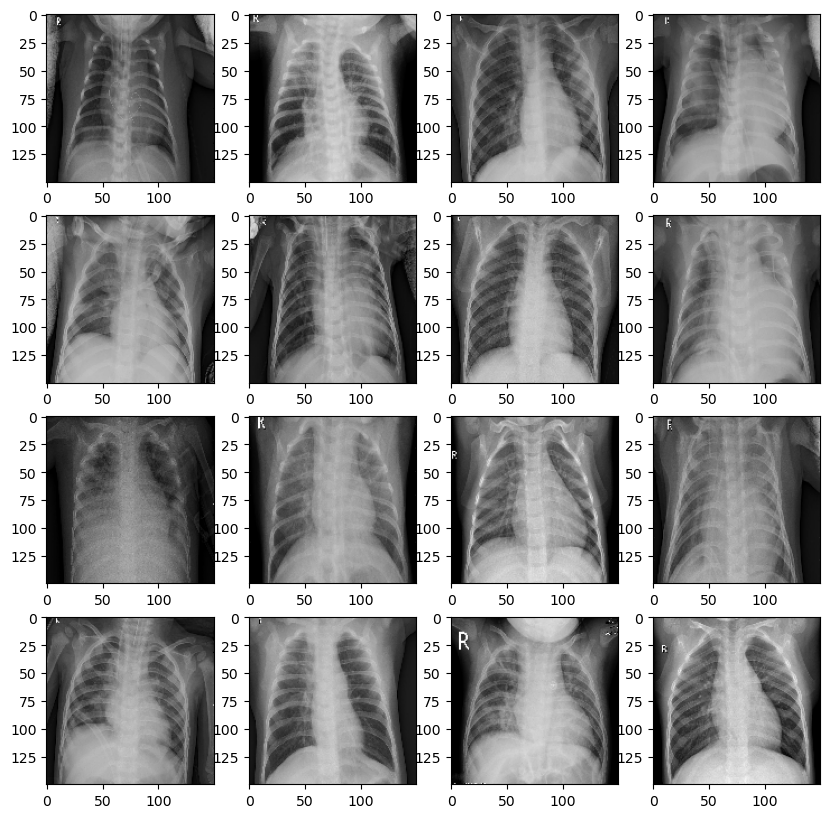

In [ ]:



import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
_=plt.figure(figsize= (10,10))
for i in range(results.shape[0]):
    _= plt.subplot(4,4,i+1)
    _=imshow(images[0][i]) ;


plt.show() ;

